<a href="https://colab.research.google.com/github/ShriyaChouhan/Retail_Sales_Prediction/blob/main/Team_Notebook_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# <b><u><center> Retail Sales Prediction : Predicting sales of a major store chain Rossmann</center></u></b>




 **Project Type**    - Regression
##### **Contribution**    - Team
##### **Team Member 1 -** Bharathwaj Bejjarapu
##### **Team Member 2 -** Saurabh Singh
##### **Team Member 3 -** Shriya Chouhan


# **Project Summary -**

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### We are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

 **CONTRIBUTION OF EACH MEMBER-**
 * **Bharathwaj Bejjarapu**: Initially we all makes our individual notebook where we done some decent part required for project and after that when we made our team notebook my main focus was on to understand each feature in both dataset like counting total rows and column, checking duplicate and missing values, visualize them and impute all missing value either with median or mode, understanding unique values and try to decode nature of each feature through their datatypes and do their conversion according to need for analysis and handling outliers in some features. After That all cleaning stuff i organised my both dataset by merging them in a final dataset so that our analysis become easy and then extract some useful information through data wrangling .My biggest challenge here was to undrstanding correlation between sales and other important features so that predicting sales through given models would give an accurate results and overall doing this project was giving a good exposure in ML Regression learning.

 * Shriya Chouhan : My Contribution starts from where bharathwaj gives me all analysed data to which i used diffrent visualization libraries like seaborn, matplotlib to check relation between features through different plots and gives explaination to each chart i used for particular question and extract insight from that chart and implement it to gain positive impact for business purposes. After doing all manipulation and experiments i made three hypothesis statements based on my analysis and obtain p value through statistical test to choose either null or alternative hypothesis. my biggest challenge was to do feature engineering where i manipulate and select features that were important for our analysis and drop unneccesary features and handling outliers, encode categorical column, apply data transformation to sales feature and divide the whole data through train-test split in 80:20 ratio.

 * Saurabh Singh : My Contribution was to make ML Model for our analysed data and predict the sales forecasting for which i used linear regression, xgboost, decision tree and random forest model. firstly i make simple models and evaluate my model performance through difference metrics like R2, MAE, RMSE and then use hyperparameter techniques likes gridsearchcv, randomsearchcv to tune my model and then check results to compare them then in the last choose one of the best model for my predictions. my biggest challenge was to handle time complexity and prediction accuracy in my models that was a bit headche for me to solve that i used best parameters in tuning to save my time by learning ml documentation for given model.

# **GitHub Link -**

https://github.com/saurabhsingh3786/Capstone-2-Retail-Sales-Prediction-

 https://github.com/bharath977/Rossmann_Retail_price_predication    
 https://github.com/ShriyaChouhan/Retail_Sales_Prediction

# **Problem Statement**


We have to Develop a supervised machine learning model to accurately forecast the daily sales of Rossmann stores. Utilize historical sales data, along with additional features such as promotions, competition, holidays, seasonality, and locality, to predict the future sales for a given store. The goal is to provide reliable sales predictions that can assist store managers in making informed decisions, optimizing inventory management, and improving overall business performance.





# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score as r2, mean_squared_error as mse, mean_absolute_error as mae
import math
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive',force_remount = True)

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/AlmaBetter/Capstone Projects/Retail Sales Prediction/"
rossmann_sales_df = pd.read_csv(path + "Rossmann Stores Data.csv", low_memory=False)
stores_df = pd.read_csv(path + "store.csv")

### Dataset First View

In [ ]:
# Dataset First Look
#Rossmann sales df first five rows view
rossmann_sales_df.head()

In [ ]:
#Rossmann sales df last five rows view
rossmann_sales_df.tail()

In [ ]:
#Stores df first five rows view
stores_df.head().T

In [ ]:
#Stores df last five rows view
stores_df.tail().T

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count

# Count the rows and columns in the Rossmann sales dataset
sales_rows, sales_cols = rossmann_sales_df.shape

# Count the rows and columns in the stores dataset
stores_rows, stores_cols = stores_df.shape

# Print the results
print(f"Rossmann sales dataset has {sales_rows} rows and {sales_cols} columns.")
print(f"Stores dataset has {stores_rows} rows and {stores_cols} columns.")


### Dataset Information

In [ ]:
#  Rossmann Sales Dataset Info
rossmann_sales_df.info()

In [ ]:
#Stores dataset info
stores_df.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count

# Count duplicate values in rossmann_sales_df
duplicate_count_sales = rossmann_sales_df.duplicated().sum()

# Count duplicate values in stores_df
duplicate_count_stores = stores_df.duplicated().sum()

print(f"Duplicate count in Rossmann Sales DataFrame: {duplicate_count_sales}")
print(f"Duplicate count in Stores DataFrame: {duplicate_count_stores}")


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
# Count missing values in rossmann_sales_df
missing_count_sales = rossmann_sales_df.isnull().sum()

# Count missing values in stores_df
missing_count_stores = stores_df.isnull().sum()

print("Null Value Counts in Rossmann Sales DataFrame:")
print("-"*45)
print(missing_count_sales)

print("\nNull Value Counts in Stores DataFrame:")
print("-"*38)
print(missing_count_stores)


In [ ]:
#visualizing the missing values
# Calculate the percentage of missing values in each column for stores_df
missing_percent_stores = (stores_df.isnull().sum() / len(stores_df)) * 100

# Create a bar plot to visualize the missing values
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_percent_stores.index, y=missing_percent_stores.values, palette='coolwarm')
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.title('Percentage of Missing Values in Stores DataFrame')
plt.show()


**Insights Gain-**

CompetitionDistance: There are only 3 missing values for the CompetitionDistance column. This indicates that most stores have their competition distances recorded.

CompetitionOpenSinceMonth and CompetitionOpenSinceYear: These two columns have 354 missing values each, which means a significant number of stores do not have information about their competition's opening month and year.

Promo2SinceWeek and Promo2SinceYear: Similar to CompetitionOpenSinceMonth and CompetitionOpenSinceYear, these two columns also have 544 missing values each. This suggests that a substantial number of stores lack data on when they started participating in Promo2 (a continuing and consecutive promotion).

PromoInterval: The PromoInterval column also has 544 missing values, indicating that many stores do not have information about the intervals at which they participate in Promo2.

**`Now We try to handle missing values in stores dataset:-`**

Out of 1115 entries there are missing values for the columns:
* CompetitionDistance- distance in meters to the nearest competitor store, the distribution plot would give us an idea about the distances at which generally the stores are opened and we would impute the values accordingly.

* CompetitionOpenSinceMonth- gives the approximate month of the time the nearest competitor was opened, mode of the column would tell us the most occuring month    
* CompetitionOpenSinceYear-  gives the approximate year of the time the nearest competitor was opened, mode of the column would tell us the most occuring month    
* Promo2SinceWeek, Promo2SinceYear and PromoInterval are NaN wherever Promo2 is 0 or False as can be seen in the first look of the dataset. They can be replaced with 0.

In [ ]:
#distribution plot of competition distance
sns.distplot(x=stores_df['CompetitionDistance'], hist = True)
plt.xlabel('Competition Distance Distribution Plot')

It seems like most of the values of the CompetitionDistance are towards the left and the distribution is skewed on the right. Median is more robust to outlier effect.

In [ ]:
# filling competition distance with the median value
stores_df['CompetitionDistance'].fillna(stores_df['CompetitionDistance'].median(), inplace = True)
stores_df['CompetitionDistance'] = stores_df['CompetitionDistance'].astype('int64')


In [ ]:
# filling competition open since month and year with the most occuring values of the columns i.e modes of those columns
stores_df['CompetitionOpenSinceMonth'].fillna(stores_df['CompetitionOpenSinceMonth'].mode()[0], inplace = True)
stores_df['CompetitionOpenSinceYear'].fillna(stores_df['CompetitionOpenSinceYear'].mode()[0], inplace = True)

In [ ]:
# imputing the nan values of promo2 related columns with 0
stores_df['Promo2SinceWeek'].fillna(value=0,inplace=True)
stores_df['Promo2SinceYear'].fillna(value=0,inplace=True)
stores_df['PromoInterval'].fillna(value=0,inplace=True)

In [ ]:
#check again for missing value if anyone left
stores_df.isnull().sum()

### What did you know about your dataset?

#### Rossmann Stores Data.csv - historical data including Sales
#### store.csv  - supplemental information about the stores


#### <u>Data fields</u>
#### Most of the fields are self-explanatory.



* **Id** - an Id that represents a (Store, Date) duple within the set
*  **Store** - a unique Id for each store
*  **Sales** - the turnover for any given day (Dependent Variable)
* **Customers** - the number of customers on a given day
* **Open** - an indicator for whether the store was open: 0 = closed, 1 = open
* **StateHoliday** - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* **SchoolHoliday** - indicates if the (Store, Date) was affected by the closure of public schools
* **StoreType** - differentiates between 4 different store models: a, b, c, d
* **Assortment** - describes an assortment level: a = basic, b = extra, c = extended. An assortment strategy in retailing involves the number and type of products that stores display for purchase by consumers.
* **CompetitionDistance** - distance in meters to the nearest competitor store
* **CompetitionOpenSince**[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* **Promo** - indicates whether a store is running a promo on that day
* **Promo2** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* **Promo2Since**[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* **PromoInterval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
# Explore each column in rossmann_sales_df
for column in rossmann_sales_df.columns:
    print(f"Column: {column}")
    print("Data Type:", rossmann_sales_df[column].dtype)
    print("Number of Unique Values:", rossmann_sales_df[column].nunique())
    print("Value Counts:")
    print(rossmann_sales_df[column].value_counts())
    print("-" * 30)


Column: Store
Data Type: int64
Number of Unique Values: 1115
Value Counts:
1      942
726    942
708    942
709    942
713    942
      ... 
159    758
637    758
636    758
633    758
155    758
Name: Store, Length: 1115, dtype: int64
------------------------------
Column: DayOfWeek
Data Type: int64
Number of Unique Values: 7
Value Counts:
5    145845
4    145845
3    145665
2    145664
1    144730
7    144730
6    144730
Name: DayOfWeek, dtype: int64
------------------------------
Column: Date
Data Type: object
Number of Unique Values: 942
Value Counts:
31-07-2015    1115
06-11-2013    1115
18-11-2013    1115
17-11-2013    1115
16-11-2013    1115
              ... 
28-10-2014     935
27-10-2014     935
26-10-2014     935
25-10-2014     935
08-12-2014     935
Name: Date, Length: 942, dtype: int64
------------------------------
Column: Sales
Data Type: int64
Number of Unique Values: 21734
Value Counts:
0        172871
5674        215
5558        197
5483        196
6214        195
    

**From the output, we can gain the following insights about the "rossmann_sales_df" dataset** :-

1. Store: There are 1115 unique stores in the dataset, and most store appears 942 times and few appears 758 times except for one store that appears only 1 time i.e index 988.

2. DayOfWeek: There are 7 unique days of the week, and each day appears roughly the same number of times, with Sunday and Monday having slightly fewer occurrences compared to the other days.

3. Date: The dataset covers a period of time from 2013-01-01 to 2015-07-31. Some dates (e.g., 2015-07-31) appear 1115 times, while others appear 935 times.

4. Sales: There are 21,734 unique sales values. Most of the sales are non-zero, with 0 appearing 172,871 times.

5. Customers: There are 4,086 unique customer counts. Most of the time, the number of customers is non-zero, with 0 appearing 172,869 times.

6. Open: There are two unique values for the "Open" column (0 and 1). Most of the time, the store is open (1) with 844,392 occurrences, and closed (0) with 172,817 occurrences.

7. Promo: There are two unique values for the "Promo" column (0 and 1). There are more days without promotions (0) than with promotions (1).

8. StateHoliday: There are four unique values in the "StateHoliday" column, including '0', 'a', 'b', and 'c'. Most of the time, it is not a state holiday ('0'), with 986,159 occurrences.

9. SchoolHoliday: There are two unique values for the "SchoolHoliday" column (0 and 1). There are more days without school holidays (0) than with school holidays (1).

Now lets explore few of these columns that have irregularities in rossmann sales df.

`Date`- Change datatype from object to datetime and extract year, month and days of month.

In [ ]:
# Convert "Date" column to datetime datatype
rossmann_sales_df['Date'] = pd.to_datetime(rossmann_sales_df['Date'])

# Extract year, month, and day of the week
rossmann_sales_df['Year'] = rossmann_sales_df['Date'].dt.year
rossmann_sales_df['Month'] = rossmann_sales_df['Date'].dt.month
rossmann_sales_df['DayOfMonth'] = rossmann_sales_df['Date'].dt.day

print("Updated Rossman Sales DataFrame:")
rossmann_sales_df.head()


Updated Rossman Sales DataFrame:


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,DayOfMonth
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31


`Sales` & `Customers`- identify those rows that zero sale value or zero customers.

In [ ]:
# Count how many rows have 0 sales value
num_rows_with_zero_sales = len(rossmann_sales_df[rossmann_sales_df['Sales'] == 0])
print("Number of rows with 0 sales value:", num_rows_with_zero_sales)

# Count how many rows have 0 customer value
num_rows_with_zero_customers = len(rossmann_sales_df[rossmann_sales_df['Customers'] == 0])
print("Number of rows with 0 customer value:", num_rows_with_zero_customers)
# Drop rows where Sales is equal to 0
#rossmann_sales_df = rossmann_sales_df.loc[rossmann_sales_df['Sales'] != 0]
# Drop rows where Customers is equal to 0
#rossmann_sales_df = rossmann_sales_df.loc[rossmann_sales_df['Customers'] != 0]

Number of rows with 0 sales value: 172871
Number of rows with 0 customer value: 172869


`StateHoliday`- The feature StateHoliday changed into a boolean variable. The value {a, b, c} became 1, other 0;

In [ ]:
rossmann_sales_df['StateHoliday'] = rossmann_sales_df['StateHoliday'].replace({'a': 1, 'b': 1, 'c': 1, '0': 0})

**Reason for doing this**-

we are replacing the values in the StateHoliday column with numerical representations. The reason to do this is to convert the categorical values ('a', 'b', 'c', and '0') into numerical equivalents (1 and 0) so that they can be used in numerical computations and analysis.

Machine learning models typically require numerical data to perform calculations and make predictions. By converting categorical variables to numerical representations, you can include them in your analysis and model training.

In [ ]:
# Dataset Columns
# Explore each column in stores_df
for column in stores_df.columns:
    print(f"Column: {column}")
    print("Data Type:", stores_df[column].dtype)
    print("Number of Unique Values:", stores_df[column].nunique())
    print("Value Counts:")
    print(stores_df[column].value_counts())
    print("-" * 30)


Column: Store
Data Type: int64
Number of Unique Values: 1115
Value Counts:
1       1
742     1
748     1
747     1
746     1
       ..
378     1
379     1
380     1
381     1
1115    1
Name: Store, Length: 1115, dtype: int64
------------------------------
Column: StoreType
Data Type: object
Number of Unique Values: 4
Value Counts:
a    602
d    348
c    148
b     17
Name: StoreType, dtype: int64
------------------------------
Column: Assortment
Data Type: object
Number of Unique Values: 3
Value Counts:
a    593
c    513
b      9
Name: Assortment, dtype: int64
------------------------------
Column: CompetitionDistance
Data Type: int64
Number of Unique Values: 655
Value Counts:
250     12
1200     9
190      8
50       8
350      8
        ..
4490     1
8970     1
9720     1
5290     1
1880     1
Name: CompetitionDistance, Length: 655, dtype: int64
------------------------------
Column: CompetitionOpenSinceMonth
Data Type: float64
Number of Unique Values: 12
Value Counts:
9.0     479
4.0


**From the exploration of the stores_df, we can gain the following insights:-**

1. Store column has 1115 unique store IDs, and each store appears only once in the dataset.

2. StoreType column has 4 unique store types, with store type "a" being the most common (602 occurrences).

3. Assortment column has 3 unique assortments, with assortment type "a" being the most common (593 occurrences).

4. CompetitionDistance column is a numerical feature representing the distance to the nearest competitor. It has 655 unique values, and the most common distance is 250.0 (12 occurrences).

5. CompetitionOpenSinceMonth column represents the month when the nearest competitor opened. It has 12 unique values, and the most common value is 9.0 (479 occurrences).

6. CompetitionOpenSinceYear column represents the year when the nearest competitor opened. It has 23 unique values, and the most common value is 2013.0 (437 occurrences).

7. Promo2 column is a binary feature indicating whether the store is participating in Promo2 or not. There are 571 stores with Promo2 and 544 stores without Promo2.
8. Promo2SinceWeek column represents the calendar week when Promo2 started for each store. It has 25 unique values, and 544 stores have no Promo2 (value 0.0).

9. Promo2SinceYear column represents the year when Promo2 started for each store. It has 8 unique values, and 544 stores have no Promo2 (value 0.0).

10. PromoInterval column represents the consecutive intervals Promo2 is started, indicating which months the promotion is active. It has 4 unique values, with "Jan,Apr,Jul,Oct" being the most common (335 occurrences).

**Data Type Conversion**: The columns `CompetitionOpenSinceMonth`, `CompetitionOpenSinceYear`, `Promo2SinceWeek`, and `Promo2SinceYear` are represented as floating-point numbers. These columns should be converted to integers since they represent months and years, which are whole numbers.



In [ ]:
# Data type conversion
stores_df['CompetitionOpenSinceMonth'] = stores_df['CompetitionOpenSinceMonth'].astype('Int64')
stores_df['CompetitionOpenSinceYear'] = stores_df['CompetitionOpenSinceYear'].astype('Int64')
stores_df['Promo2SinceWeek'] = stores_df['Promo2SinceWeek'].astype('Int64')
stores_df['Promo2SinceYear'] = stores_df['Promo2SinceYear'].astype('Int64')


We will do categorical encoding for `StoreType`, `Assortment`, and `PromoInterval` in Feature Engineering .

Since most of the stores open between 1990 to 2015, there are two store that opens in 1900 and 1961 so we drop them as think of them as outliers or typing mistake while creating dataset.

In [ ]:
# Drop rows with CompetitionOpenSinceYear values 1900 and 1961
stores_df = stores_df[~stores_df['CompetitionOpenSinceYear'].isin([1900, 1961])]

# Reset the index after dropping rows
stores_df.reset_index(drop=True, inplace=True)


In [ ]:
# Dataset Describe
# Describe rossmann_sales_df
rossmann_sales_df_description = rossmann_sales_df.describe()
print("Description of Rossmann Sales DataFrame:")
rossmann_sales_df_description.T



Description of Rossmann Sales DataFrame:


,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.429727,321.908651,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,3.998341,1.997391,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.818972,3849.926175,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.145946,464.411734,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.830107,0.375539,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.381515,0.485759,0.0,0.0,0.0,1.0,1.0
StateHoliday,1017209.0,0.030525,0.172026,0.0,0.0,0.0,0.0,1.0
SchoolHoliday,1017209.0,0.178647,0.383056,0.0,0.0,0.0,0.0,1.0
Year,1017209.0,2013.832292,0.777396,2013.0,2013.0,2014.0,2014.0,2015.0
Month,1017209.0,6.115173,3.390429,1.0,3.0,6.0,9.0,12.0


In [ ]:
# Describe stores_df
stores_df_description = stores_df.describe()
print("\nDescription of Stores DataFrame:")
stores_df_description.T



Description of Stores DataFrame:


,count,mean,std,min,25%,50%,75%,max
Store,1113.0,558.139263,321.977388,1.0,280.0,558.0,837.0,1115.0
CompetitionDistance,1113.0,5398.548967,7659.624525,20.0,720.0,2325.0,6870.0,75860.0
CompetitionOpenSinceMonth,1113.0,7.792453,2.773373,1.0,6.0,9.0,9.0,12.0
CompetitionOpenSinceYear,1113.0,2010.186882,4.152135,1990.0,2008.0,2012.0,2013.0,2015.0
Promo2,1113.0,0.511231,0.500099,0.0,0.0,1.0,1.0,1.0
Promo2SinceWeek,1113.0,12.026056,15.496177,0.0,0.0,1.0,22.0,50.0
Promo2SinceYear,1113.0,1028.473495,1006.078612,0.0,0.0,2009.0,2012.0,2015.0


**Insights from Rossmann Sales DataFrame Description**:

1. The Sales column ranges from 46 to 41,551 with a mean of approximately 6,956. This indicates that there is a wide variation in sales across different stores and days.
2. The Customers column ranges from 8 to 7,388 with a mean of approximately 763. This suggests that there is variation in the number of customers visiting the stores.
3. The Open column that has a single value of 1, indicating that all stores are open otherwise digit 0 indicating store are closed in the dataset.
4. The Promo column has a mean of approximately 0.45, indicating that promotions are active in around 45% of the cases.
5. The StateHoliday column is mostly filled with the value 0, with very few occurrences of 'a', 'b', and 'c'.
6. The SchoolHoliday column indicates that around 19% of the data corresponds to school holidays.

**Insights from Stores DataFrame Description**:

1. The CompetitionDistance column varies widely, ranging from 20 to 75,860. This indicates that the distance to the nearest competitor can significantly differ between stores.

2. The CompetitionOpenSinceMonth and CompetitionOpenSinceYear columns show the month and year of when the competition opened, respectively. Most stores have values in the month of 9 and the year 2013.

3. The Promo2 column has values 0 and 1, indicating whether the store is participating in Promo2 or not.
4. The Promo2SinceWeek and Promo2SinceYear columns represent the week and year when Promo2 started for each store.

5. The columns StoreType and Assortment are categorical, and they have multiple unique values indicating different store types and assortments.

### Variables Description

Variable Description for Rossmann Sales DataFrame (rossmann_sales_df):

Store: The store ID.

DayOfWeek: The day of the week (1: Monday, 2: Tuesday, ..., 7: Sunday).

Date: The date of the sales record.

Sales: The sales value for that particular day and store.

Customers: The number of customers on that day and store.

Open: Indicates whether the store was open on that day (1: Open, 0: Closed).

Promo: Indicates whether a promotional offer was active on that day (1: Yes, 0: No).

StateHoliday: Indicates whether it is a state holiday (0: Not a holiday, 1: Public holiday, 2: Easter holiday, 3: Christmas holiday).

SchoolHoliday: Indicates whether it is a school holiday (1: Yes, 0: No).

Year: The year extracted from the Date column.

Month: The month extracted from the Date column.

DayOfMonth: The day of the month extracted from the Date column.

Variable Description for Stores DataFrame (stores_df):

Store: The store ID.

StoreType: The type of store (a, b, c, d).

Assortment: The assortment type (a: Basic, b: Extra, c: Extended).

CompetitionDistance: The distance to the nearest competitor store.

CompetitionOpenSinceMonth: The month when the nearest competitor store opened.

CompetitionOpenSinceYear: The year when the nearest competitor store opened.

Promo2: Indicates whether the store is participating in Promo2 (1: Yes, 0: No).

Promo2SinceWeek: The week when Promo2 started for the store.

Promo2SinceYear: The year when Promo2 started for the store.

PromoInterval: The interval of Promo2 for the store (e.g., Jan, Apr, Jul, Oct).

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
# Unique Values for each variable in rossmann_sales_df (excluding 'Date')
for column in rossmann_sales_df.columns:
    if column != 'Date':
        unique_values = rossmann_sales_df[column].unique()
        print(f"Unique Values for {column}:\n{unique_values}\n")



Unique Values for Store:
[   1    2    3 ... 1113 1114 1115]

Unique Values for DayOfWeek:
[5 4 3 2 1 7 6]

Unique Values for Sales:
[ 5263  6064  8314 ...   660 17815 23303]

Unique Values for Customers:
[ 555  625  821 ... 3900   36 4065]

Unique Values for Open:
[1 0]

Unique Values for Promo:
[1 0]

Unique Values for StateHoliday:
[0 1]

Unique Values for SchoolHoliday:
[1 0]

Unique Values for Year:
[2015 2014 2013]

Unique Values for Month:
[ 7 12 11 10  9  8  6  5  4  3  2  1]

Unique Values for DayOfMonth:
[31 30 29 28 27 26 25 24 23 22 21 20 19 18 17 16 15 14 13  7  6  5  4  3
  2  1 12 11 10  9  8]



Initially we have two values of `Open` column i.e 0 and 1 but when we drop those rows that have zero sales and zero customers then automatically it also drop those value of 0 in `Open` column too so in the end we have only single digit 1 that stands for stores are open.

In [ ]:
# Unique Values for each variable in stores_df
for column in stores_df.columns:
    unique_values = stores_df[column].unique()
    print(f"Unique Values for {column}:\n{unique_values}\n")


Unique Values for Store:
[   1    2    3 ... 1113 1114 1115]

Unique Values for StoreType:
['c' 'a' 'd' 'b']

Unique Values for Assortment:
['a' 'c' 'b']

Unique Values for CompetitionDistance:
[ 1270   570 14130   620 29910   310 24000  7520  2030  3160   960  1070
  1300  4110  3270    50 13840  3240  2340   550  1040  4060  4590   430
  2300    60  1200  2170    40  9800  2910  1320  2240  7660   540  4230
  1090   260   180  1180   290  4880  9710   270  1060 18010  6260 10570
   450 30360  7170   720  6620   420  7340  2840  5540   350  2050  3700
 22560   410   250  1130  4840 17500  2200  1650   330 22440 19960  3510
  3320  7910  2370 22390  2710 11810  1870   480   560 10690  2380  2410
   240 16690 14620  1890  8780  8980 15140 17930  2440   150  5210   390
  6190  1390  1930  2190  3300 46590  7890  1630 20930  4510  5740   680
  3450  3580  2100  2290  3570 58260 16760  1410   760  3370  1350  2000
  2460   900   920  5190  1730 25360  1700  1540  2930 16570   280  8540
  2

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# Merge the datasets on the 'Store' column
merged_df = pd.merge(rossmann_sales_df, stores_df, on='Store', how='inner')

# Display the merged DataFrame
merged_df


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,DayOfMonth,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,...,31,c,a,1270,9,2008,0,0,0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,2015,...,30,c,a,1270,9,2008,0,0,0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,2015,...,29,c,a,1270,9,2008,0,0,0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,2015,...,28,c,a,1270,9,2008,0,0,0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,2015,...,27,c,a,1270,9,2008,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015504,1115,6,2013-05-01,4771,339,1,0,0,1,2013,...,1,d,c,5350,9,2013,1,22,2012,"Mar,Jun,Sept,Dec"
1015505,1115,5,2013-04-01,4540,326,1,0,0,1,2013,...,1,d,c,5350,9,2013,1,22,2012,"Mar,Jun,Sept,Dec"
1015506,1115,4,2013-03-01,4297,300,1,0,0,1,2013,...,1,d,c,5350,9,2013,1,22,2012,"Mar,Jun,Sept,Dec"
1015507,1115,3,2013-02-01,3697,305,1,0,0,1,2013,...,1,d,c,5350,9,2013,1,22,2012,"Mar,Jun,Sept,Dec"


###***UNIVARIATE ANALYSIS***

In [ ]:
#Question-1: Distribution of Sales?
# Summary Statistics for Sales
sales_summary = merged_df['Sales'].describe()
print("Summary Statistics for Sales:")
print(sales_summary)
print("-" * 30)

Summary Statistics for Sales:
count    1.015509e+06
mean     5.772349e+03
std      3.850104e+03
min      0.000000e+00
25%      3.726000e+03
50%      5.741000e+03
75%      7.853000e+03
max      4.155100e+04
Name: Sales, dtype: float64
------------------------------


In [ ]:
#Question -2 : Distribution among some important features?

# Select columns for summary statistics
selected_columns = ['Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment', 'PromoInterval']

# Create an empty DataFrame to store the summary statistics
summary_df = pd.DataFrame()

# Calculate summary statistics for each column and append to the summary_df
for column in selected_columns:
    summary = merged_df[column].describe().to_frame(column)
    summary_df = pd.concat([summary_df, summary], axis=1)

print("Summary Statistics for Categorical Variables:")
summary_df


Summary Statistics for Categorical Variables:


,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,PromoInterval
count,1.015509e+06,1.015509e+06,1.015509e+06,1015509,1015509,1015509.0
mean,3.815171e-01,3.051869e-02,1.786562e-01,NaN,NaN,NaN
std,4.857592e-01,1.720097e-01,3.830644e-01,NaN,NaN,NaN
min,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN
25%,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN
50%,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN
75%,1.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN
max,1.000000e+00,1.000000e+00,1.000000e+00,NaN,NaN,NaN
unique,NaN,NaN,NaN,4,3,4.0
top,NaN,NaN,NaN,a,a,0.0


In [ ]:
#Question - 3: calculate and visualize the average number of visits per customer, the average spending per customer, and the customer retention rate.

# Calculate average number of visits per customer
visits_per_customer = merged_df.groupby('Customers')['Date'].count().mean()
print(f"visits per customer:{visits_per_customer}")
# Calculate average spending per customer
average_spending_per_customer = merged_df.groupby('Customers')['Sales'].mean().mean()
print(f"average spending per customer:{average_spending_per_customer}")
# Calculate customer retention rate
unique_customers_per_month = merged_df.groupby(['Year', 'Month'])['Customers'].nunique()
total_customers_per_month = merged_df.groupby(['Year', 'Month'])['Customers'].count()
customer_retention_rate = (unique_customers_per_month / total_customers_per_month).mean()


# Customer Retention Rate
print(f"Customer Retention Rate: {customer_retention_rate:.2%}")



visits per customer:248.5337738619677
average spending per customer:13906.822928186137
Customer Retention Rate: 7.93%


In [ ]:
#Question 4: Calculate the average number of promotional days per week or month and analyze its impact on sales.
# Calculate average sales for days with promotions (Promo = 1)
promo_days_sales = merged_df[merged_df['Promo'] == 1]['Sales'].mean()

# Calculate average sales for days without promotions (Promo = 0)
non_promo_days_sales = merged_df[merged_df['Promo'] == 0]['Sales'].mean()

# Calculate the promotional intensity
promotional_intensity = promo_days_sales / non_promo_days_sales

print(f"Promotional Intensity: {promotional_intensity:.2f}")


Promotional Intensity: 1.81


###***BIVARIATE ANALYSIS***

In [ ]:
#Question- 5: Effects of customers, promo and dayofweek on sales?

# Calculate mean sales for each unique combination of customers, promo, and day of week
grouped_df = merged_df.groupby(['Customers', 'Promo', 'DayOfWeek'])['Sales'].mean().reset_index()

# Create a new DataFrame with columns for 'Customers', 'Promo', 'DayOfWeek', and 'SalesMean'
new_df = pd.DataFrame(columns=['Customers', 'Promo', 'DayOfWeek', 'SalesMean'])

# Populate the new DataFrame
for _, group in grouped_df.groupby(['Customers', 'Promo']):
    customers, promo = _
    group_sorted = group.sort_values('DayOfWeek')
    sales_mean_values = group_sorted['Sales'].values
    is_increasing = np.all(np.diff(sales_mean_values) >= 0)
    new_df = new_df.append({
        'Customers': customers,
        'Promo': promo,
        'DayOfWeek': group_sorted['DayOfWeek'].values,
        'SalesMean': sales_mean_values,
        'IsIncreasing': is_increasing
    }, ignore_index=True)

new_df


,Customers,Promo,DayOfWeek,SalesMean,IsIncreasing
0,0,0,"[1, 2, 3, 4, 5, 6, 7]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",True
1,0,1,"[1, 2, 3, 4, 5]","[0.0, 0.0, 0.0, 0.0, 0.0]",True
2,3,1,[2],[0.0],True
3,5,1,[4],[0.0],True
4,8,0,[6],[46.0],True
...,...,...,...,...,...
7506,5297,0,[4],[37403.0],True
7507,5387,0,[1],[34692.0],True
7508,5458,1,[5],[38484.0],True
7509,5494,1,[5],[35702.0],True


In [ ]:
#Question- 6: Effects of SchoolHoliday, StateHoliay, StoreType and Assortment on Sales?
# Grouping by StateHoliday and calculating mean sales
stateholiday_sales = merged_df.groupby('StateHoliday')['Sales'].mean().reset_index()

# Grouping by SchoolHoliday and calculating mean sales
schoolholiday_sales = merged_df.groupby('SchoolHoliday')['Sales'].mean().reset_index()

# Grouping by StoreType and calculating mean sales
storetype_sales = merged_df.groupby('StoreType')['Sales'].mean().reset_index()

# Grouping by Assortment and calculating mean sales
assortment_sales = merged_df.groupby('Assortment')['Sales'].mean().reset_index()

# Creating a new DataFrame to store the results
sales_by_feature_df = pd.DataFrame({
    'StateHoliday': stateholiday_sales['StateHoliday'],
    'StateHoliday_SalesMean': stateholiday_sales['Sales'],
    'SchoolHoliday': schoolholiday_sales['SchoolHoliday'],
    'SchoolHoliday_SalesMean': schoolholiday_sales['Sales'],
    'StoreType': storetype_sales['StoreType'],
    'StoreType_SalesMean': storetype_sales['Sales'],
    'Assortment': assortment_sales['Assortment'],
    'Assortment_SalesMean': assortment_sales['Sales']
})

# Display the new DataFrame
sales_by_feature_df


,StateHoliday,StateHoliday_SalesMean,SchoolHoliday,SchoolHoliday_SalesMean,StoreType,StoreType_SalesMean,Assortment,Assortment_SalesMean
0,0.0,5945.916995,0.0,5619.535221,a,5736.595539,a,5479.036867
1,1.0,258.642714,1.0,6474.885442,b,10058.837334,b,8553.931999
2,NaN,NaN,NaN,NaN,c,5723.629246,c,6057.871255
3,NaN,NaN,NaN,NaN,d,5639.345924,NaN,NaN


In [ ]:
#Question-7 : what is average number of customers per day of week?

average_customers_per_day_of_week = merged_df.groupby('DayOfWeek')['Customers'].mean()

print(average_customers_per_day_of_week)



DayOfWeek
1    813.105600
2    761.049236
3    721.679251
4    697.595648
5    743.168866
6    656.986068
7     35.846755
Name: Customers, dtype: float64


In [ ]:
#Question- 8: average number of customers on stateholiday and schoolholiday?
# Calculate average number of customers on state holidays and non-state holidays
state_holiday_customers = merged_df.groupby('StateHoliday')['Customers'].mean()
non_state_holiday_customers = merged_df[merged_df['StateHoliday'] == 0]['Customers'].mean()

# Calculate average number of customers on school holidays and non-school holidays
school_holiday_customers = merged_df.groupby('SchoolHoliday')['Customers'].mean()
non_school_holiday_customers = merged_df[merged_df['SchoolHoliday'] == 0]['Customers'].mean()

print("Average number of customers on state holidays:", state_holiday_customers[1.0])
print("Average number of customers on non-state holidays:", non_state_holiday_customers)
print("Average number of customers on school holidays:", school_holiday_customers[1])
print("Average number of customers on non-school holidays:", non_school_holiday_customers)


Average number of customers on state holidays: 40.13164687661332
Average number of customers on non-state holidays: 651.8359825173156
Average number of customers on school holidays: 704.4379006432339
Average number of customers on non-school holidays: 617.665062907484


In [ ]:
#Question- 9: what is total number of customers in each storetype and share of each storetype in total stores type?
# Calculate the total number of customers in the dataset
total_customers =  merged_df['Customers'].sum()

# Group the DataFrame by 'StoreType' and calculate the sum of 'Customers' for each store type
customer_by_store_type = merged_df.groupby('StoreType')['Customers'].sum()

# Calculate the percentage of customers in each store type
percentage_customers_by_store_type = (customer_by_store_type / total_customers) * 100

print(percentage_customers_by_store_type)
# Count the number of stores in each store type
store_type_counts = merged_df["StoreType"].value_counts()

# Calculate the share of each store type
store_type_share = store_type_counts / len(merged_df) * 100
print(store_type_share)

StoreType
a    56.460554
b     4.893661
c    14.328385
d    24.317400
Name: Customers, dtype: float64
a    54.245605
d    30.720555
c    13.475016
b     1.558824
Name: StoreType, dtype: float64


In [ ]:
#Question- 10: Correlation between sales and competitionDistance.
#Data Wrangling for Sales vs. Competition Distance
sales_competition_data = merged_df[['Sales', 'CompetitionDistance']]

print(sales_competition_data)

# Calculate the correlation coefficient between Sales and CompetitionDistance
correlation_coefficient = sales_competition_data['Sales'].corr(sales_competition_data['CompetitionDistance'])
print("correlation_coefficient is:",correlation_coefficient)


         Sales  CompetitionDistance
0         5263                 1270
1         5020                 1270
2         4782                 1270
3         5011                 1270
4         6102                 1270
...        ...                  ...
1015504   4771                 5350
1015505   4540                 5350
1015506   4297                 5350
1015507   3697                 5350
1015508      0                 5350

[1015509 rows x 2 columns]
correlation_coefficient is: -0.01880880533084867


In [ ]:
#Question- 11: how sales are varying per day in a month and varying per month in a year?

# Group the data by Day of Month and calculate the mean sales for each day
sales_by_day_of_month = merged_df.groupby('DayOfMonth')['Sales'].mean().reset_index()
print(sales_by_day_of_month)
# Group the data by Month and calculate the mean sales for each month
sales_by_month = merged_df.groupby('Month')['Sales'].mean().reset_index()
print(sales_by_month)

    DayOfMonth        Sales
0            1  5461.876232
1            2  5699.232380
2            3  5748.574948
3            4  5545.495657
4            5  5375.639089
5            6  5874.205825
6            7  5931.267220
7            8  5680.031306
8            9  5867.814037
9           10  5863.335328
10          11  5962.937266
11          12  7082.855561
12          13  5740.059140
13          14  5379.433127
14          15  5830.169015
15          16  6377.201023
16          17  6122.627180
17          18  6368.689192
18          19  5825.094499
19          20  5838.297556
20          21  5452.584792
21          22  5468.822848
22          23  5673.048610
23          24  4974.197942
24          25  4822.327799
25          26  4835.854707
26          27  5800.091089
27          28  5880.181220
28          29  5875.273812
29          30  7295.481456
30          31  6233.296459
    Month        Sales
0       1  5186.584129
1       2  6129.262063
2       3  5806.047476
3       4  6

In [ ]:
#Question- 12 : Average Sales Per Year?

# Group the data by Year and calculate the mean sales for each year
sales_by_year = merged_df.groupby('Year')['Sales'].mean().reset_index()
sales_by_year

,Year,Sales
0,2013,5656.317078
1,2014,5831.908740
2,2015,5877.889615


###***MULTIVARIATE ANALYSIS***

First,we use a pairplot as It is a visualization technique that allows us to plot pairwise relationships between multiple variables in a dataset.

Pairplot is useful for identifying correlations and patterns between multiple variables in a dataset. It can be especially useful in exploratory data analysis, as it allows us to quickly examine the relationships between multiple variables and identify any interesting features or outliers.

In [ ]:
#Create a pairplot to check correlation between all important features like Sales, Customers, Promo, CompetitionDistance etc.
Sales = merged_df['Sales']
Customer = merged_df['Customers']
Promo = merged_df['Promo']
CompetitionDistance = merged_df['CompetitionDistance']
Month = merged_df['Month']
Year = merged_df['Year']

In [ ]:
#Heatmap for respected feaures to find correlation between them.
#we need only meaningful numeric columns here, let's drop the unnecessary to get a clear picture
columns_to_drop = ['Store', 'Year', 'Month', 'DayOfMonth']
corr_df = merged_df.drop(columns = columns_to_drop, axis =1)

### What all manipulations have you done and insights you found?

First, we merge our both dataset into a final dataset which makes our analysis easy Then we do our analysis according to given guidelines to do analysis on UBM rules. So, first we do univariate analysis where we checked distribution of some features like sales, promo, stateholiday, schoolholiday, storetype, assortment and promointerval. next, we calculate and visualize the average number of visits per customers, average spending per customer and customer retention rate. after that we calculate average number of promotional days per week or month and analyze their impact on sales. In Bivariate Analysis, we studied effects of customers, promo and dayofweek on sales and next we check effects of holidays , storetype and assortment on sales then next we calculate average number of customer per day of week and average customers on stateholiday & schoolholidays. Next, we analyze total number of customers in each storetype and share of each storetype in total stores then checked the correlation b/w sales and competitiondistance. moving ahead, we studied about varying of sales per day in a month and sales varying nature every month in a year and calculate average sales per year. in Multivariate analysis, we do use of pairplot and heatmap to check relationship between multiple features in our dataset.After all we gain insights from our manipulation that we discussed in our data visualization for each plot we made there.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

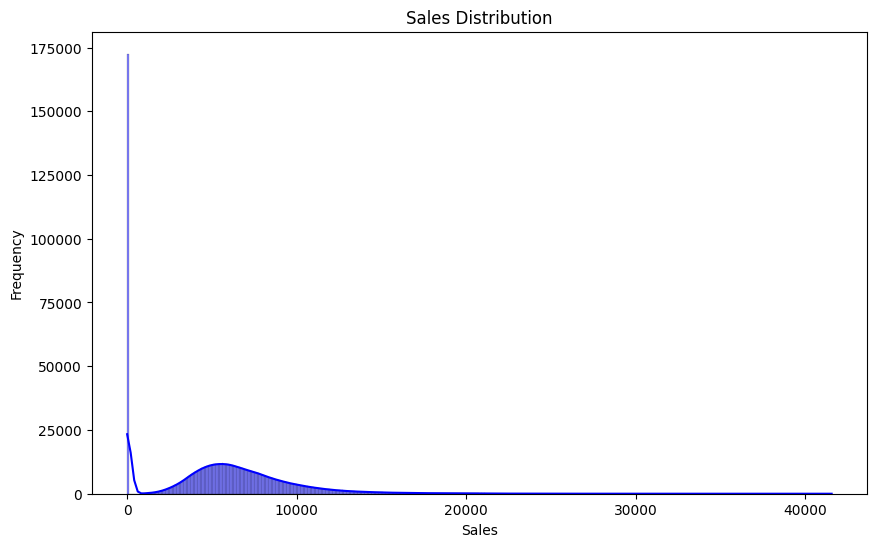

In [ ]:
# Chart - 1 visualization code
#Question-1: Distribution of Sales?
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Sales'], kde=True, color='blue')
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?

I picked the histogram with a kernel density estimate (KDE) plot for the 'Sales' distribution because it is a suitable choice for visualizing the distribution of a continuous numerical variable like sales. Here are some reasons why the histogram with KDE plot is an appropriate choice:

1. Data Distribution: The histogram shows the distribution of sales values across different bins, allowing you to see the frequency of sales values in specific ranges. The KDE plot provides a smooth estimate of the probability density function, giving a clearer view of the underlying data distribution.

2. Continuous Data: The 'Sales' column contains continuous numerical data, and a histogram is well-suited to represent this type of data. It can show the range and frequency of sales values, providing an overview of how sales are distributed.

3. Skewness and Outliers: The histogram can reveal if the 'Sales' distribution is skewed (asymmetric) or contains outliers. Skewness and outliers can be important insights to understand the sales behavior in the dataset.

4. Central Tendency: The histogram allows you to observe the central tendency of the 'Sales' data, which can be further verified through the summary statistics like mean and median.

##### 2. What is/are the insight(s) found from the chart?

1. Distribution Shape: The histogram shows that the 'Sales' distribution is positively skewed, as it extends more towards higher sales values. This suggests that there are relatively more instances of lower sales values and fewer instances of very high sales values.

2. Central Tendency: The peak of the histogram (highest frequency bin) indicates the central tendency of the data, which is around 6,000 to 8,000 sales. This is where the most frequent sales values are concentrated.

3. Spread and Variability: The spread of the data can be observed by looking at the width of the distribution. The wider the spread, the more variability there is in the sales values. In this case, the spread appears to be moderate, as the distribution covers a range of sales values from around 0 to 40,000.

4. Outliers: There are some sales values that are far from the central region, indicated by the long tail to the right. These points represent potential outliers, which are sales values significantly higher than the majority of the data points.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact**-

1. Understanding Sales Distribution: The histogram with KDE plot provides an understanding of how sales are distributed across different ranges. This insight can help businesses identify their most common sales figures and assess the overall spread of sales values. By understanding the distribution, businesses can set realistic sales targets, plan inventory management, and allocate resources effectively.

2. Identifying Sales Patterns: The shape of the distribution can reveal sales patterns and trends. For example, if the distribution is skewed towards higher sales values, it might indicate that certain products or promotions are particularly popular. This insight can guide marketing strategies to capitalize on successful products and promotions.

3. Detecting Outliers: The histogram can highlight potential outliers—sales values that are significantly higher or lower than the majority. Outliers may represent exceptional events or errors in data entry. Identifying and investigating outliers can help businesses pinpoint anomalies and address any issues affecting sales performance.

**Negative Business Impact**:-

1. Skewed Distribution: If the sales distribution is heavily skewed, with a majority of sales concentrated towards the lower end, it could indicate difficulty in achieving significant sales growth or challenges in expanding market share. In such cases, businesses may need to explore strategies to stimulate demand and attract more customers.

2. Sales Decline in Specific Stores: If the analysis reveals a consistent decline in sales in specific stores or regions, it may suggest operational issues or poor market conditions in those areas. Addressing these issues is crucial to avoid further negative impact and focus on areas with higher growth potential.

3. No Growth in High-Performing Stores: If the sales distribution shows no significant growth in high-performing stores, it might indicate that the stores have reached their saturation point. In such cases, businesses may need to diversify their offerings, introduce new products, or explore expansion opportunities in other areas.

#### Chart - 2

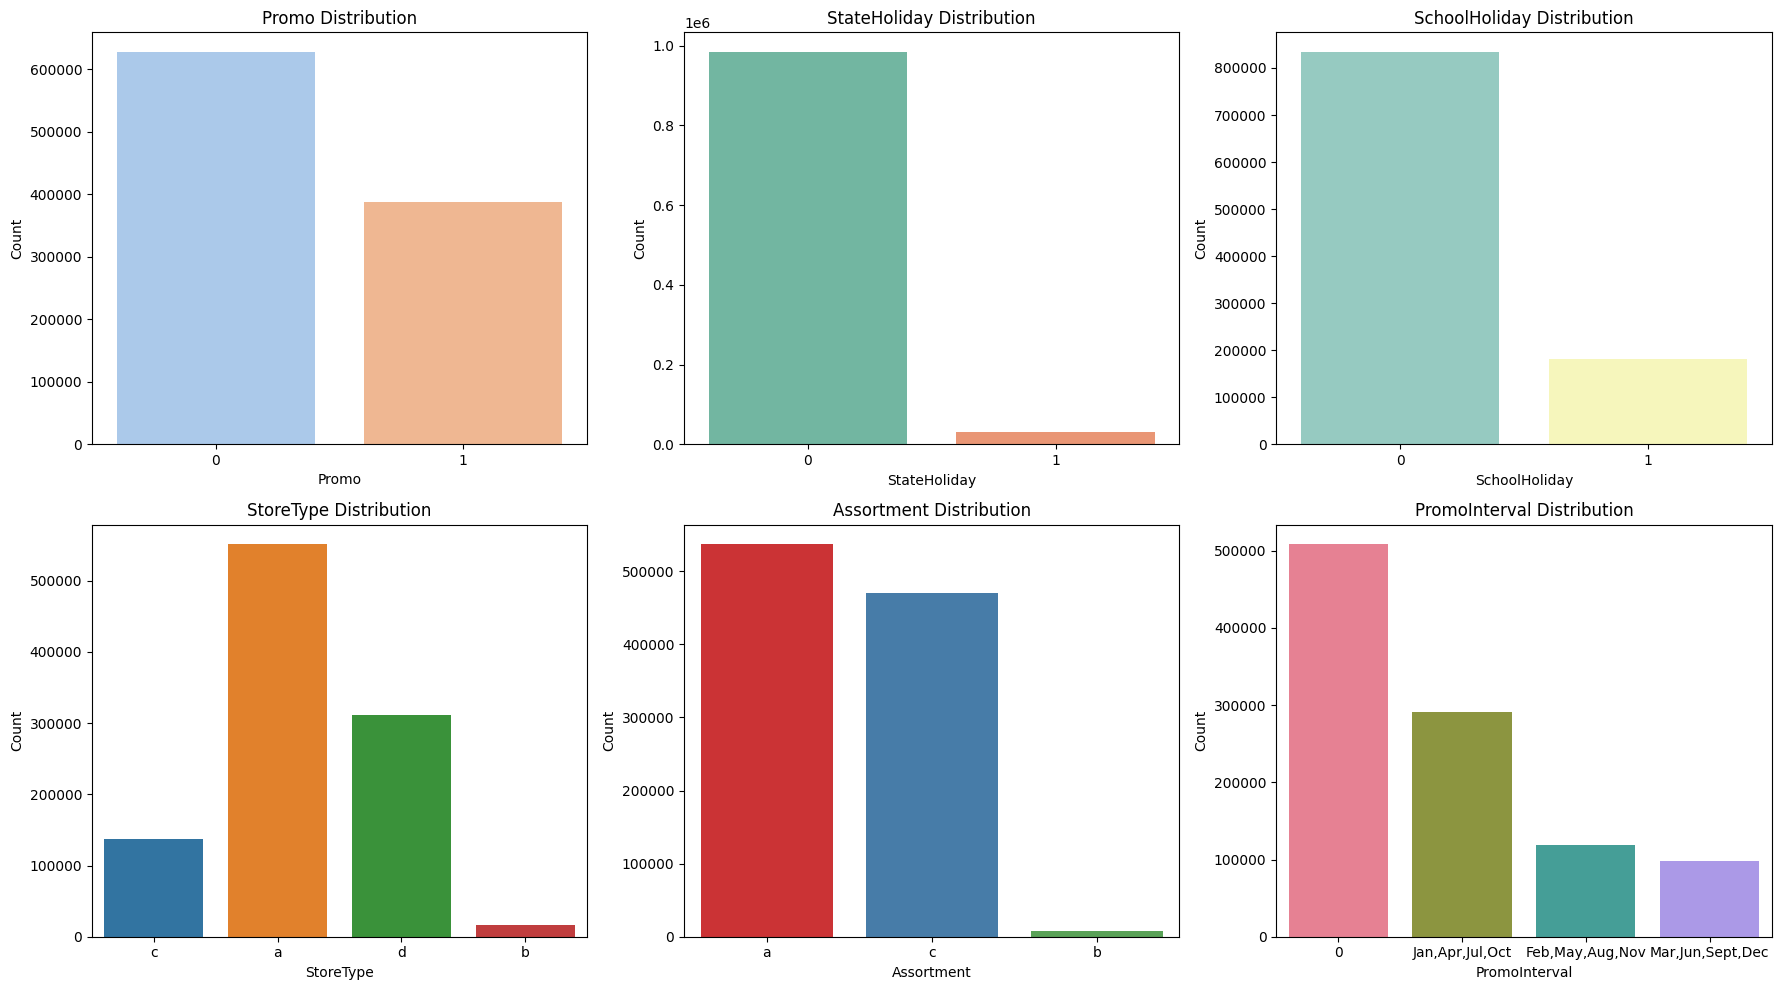

In [ ]:
# Chart - 2 visualization code
#Question -2 : Distribution among some important features?
# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Univariate Analysis - Promo Distribution
sns.countplot(data=merged_df, x='Promo', palette='pastel', ax=axes[0, 0])
axes[0, 0].set_title('Promo Distribution')
axes[0, 0].set_xlabel('Promo')
axes[0, 0].set_ylabel('Count')

# Univariate Analysis - StateHoliday Distribution
sns.countplot(data=merged_df, x='StateHoliday', palette='Set2', ax=axes[0, 1])
axes[0, 1].set_title('StateHoliday Distribution')
axes[0, 1].set_xlabel('StateHoliday')
axes[0, 1].set_ylabel('Count')

# Univariate Analysis - SchoolHoliday Distribution
sns.countplot(data=merged_df, x='SchoolHoliday', palette='Set3', ax=axes[0, 2])
axes[0, 2].set_title('SchoolHoliday Distribution')
axes[0, 2].set_xlabel('SchoolHoliday')
axes[0, 2].set_ylabel('Count')

# Univariate Analysis - StoreType Distribution
sns.countplot(data=merged_df, x='StoreType', palette='tab10', ax=axes[1, 0])
axes[1, 0].set_title('StoreType Distribution')
axes[1, 0].set_xlabel('StoreType')
axes[1, 0].set_ylabel('Count')

# Univariate Analysis - Assortment Distribution
sns.countplot(data=merged_df, x='Assortment', palette='Set1', ax=axes[1, 1])
axes[1, 1].set_title('Assortment Distribution')
axes[1, 1].set_xlabel('Assortment')
axes[1, 1].set_ylabel('Count')

# Univariate Analysis - PromoInterval Distribution
sns.countplot(data=merged_df, x='PromoInterval', palette='husl', ax=axes[1, 2])
axes[1, 2].set_title('PromoInterval Distribution')
axes[1, 2].set_xlabel('PromoInterval')
axes[1, 2].set_ylabel('Count')

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

I choose the countplot for the distribution of categorical variables (promo, state holiday, school holiday, store type, assortment, and promo interval) because it is a suitable plot for visualizing the frequency of each category in a categorical variable.

The countplot is a bar plot that shows the number of occurrences of each category in a categorical variable. It provides an easy way to compare the frequencies of different categories and quickly identify the most common and least common categories.

##### 2. What is/are the insight(s) found from the chart?

**Insight Gain**-

1. Promo Distribution:

*   The countplot for Promo will show the frequency of days with promotional activities (1) and without promotions (0).
*   We can observe the balance between promotional and non-promotional days.

*   The countplot will help us identify the proportion of days with promotions compared to days without promotions.

2. StateHoliday Distribution:

*   The countplot for StateHoliday will show the frequency of different state holidays (0,1).
*   We can observe how many days fall under each state holiday category.
*   The plot will help us understand the distribution of state holidays in the dataset.

3. SchoolHoliday Distribution:

* The countplot for SchoolHoliday will show the frequency of school holidays (1) and non-school holidays (0).

* We can observe the proportion of days with school holidays compared to regular days.
* The plot will help us understand the distribution of school holidays in the dataset.


4. StoreType Distribution:

* The countplot for StoreType will show the frequency of different store types (a, b, c, d).
* We can observe the proportion of each store type in the dataset.
* The plot will help us understand the distribution of store types.


5. Assortment Distribution:

* The countplot for Assortment will show the frequency of different assortments (a, b, c).
* We can observe the proportion of each assortment type in the dataset.
* The plot will help us understand the distribution of assortments.


6. PromoInterval Distribution:

* The countplot for PromoInterval will show the frequency of different promo intervals (0, Jan,Apr,Jul,Oct, Feb,May,Aug,Nov, Mar,Jun,Sept,Dec).
* We can observe the proportion of each promo interval in the dataset.
* The plot will help us understand the distribution of promo intervals.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

* Understanding the distribution of promotional days (Promo) can help the business optimize their promotional strategies. They can focus more on days with high sales potential (promotional days) to boost revenue and customer footfall.
* Knowing the distribution of state holidays (StateHoliday) and school holidays (SchoolHoliday) can help in planning marketing campaigns or special offers during those periods to attract more customers and increase sales.
* Analyzing the distribution of store types (StoreType) and assortments (Assortment) can help identify which types are performing better in terms of sales and profitability. This insight can guide decisions on store expansion or product assortment optimization.

**Insights Leading to Negative Growth:**

* While the summary statistics don't explicitly indicate any insights leading to negative growth, it's essential to conduct further analysis and consider the context of the business.
* Negative growth may occur if promotional activities (Promo) are not strategically planned and end up being ineffective or costly without generating significant sales.
* Poor performance during state holidays (StateHoliday) or school holidays (SchoolHoliday) may indicate missed opportunities or a lack of appealing offers during peak shopping periods, leading to negative growth.


#### Chart - 3

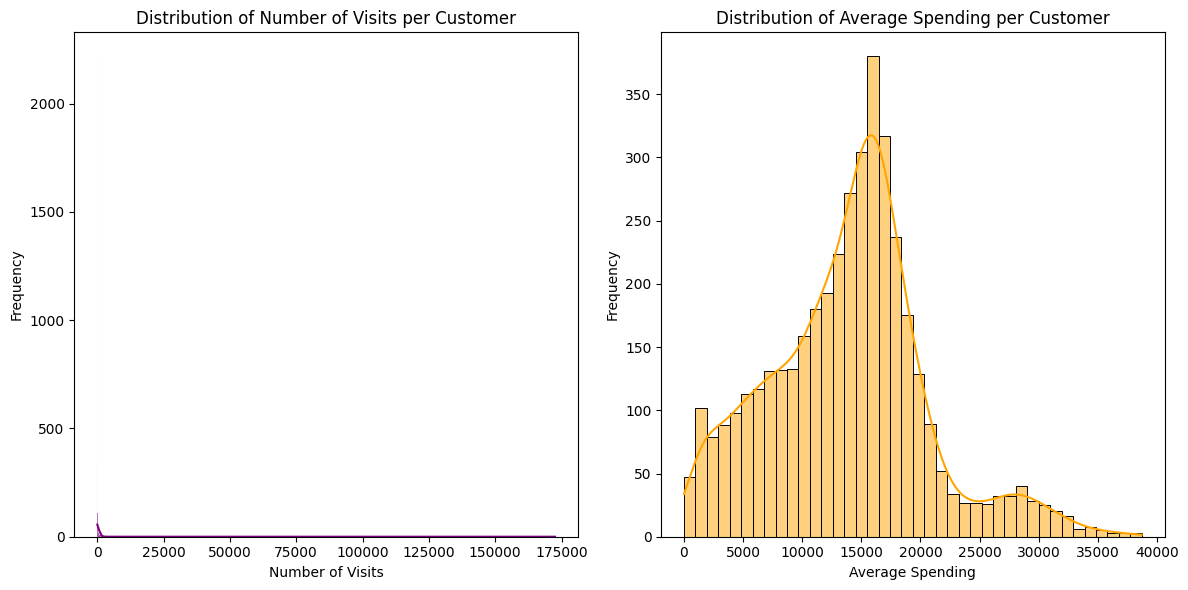

In [ ]:
# Chart - 3 visualization code
#Question - 3: calculate and visualize the average number of visits per customer, the average spending per customer, and the customer retention rate.

plt.figure(figsize=(12, 6))

# Average Number of Visits per Customer
plt.subplot(1, 2, 1)
sns.histplot(merged_df.groupby('Customers')['Date'].count(), kde=True, color='purple')
plt.title('Distribution of Number of Visits per Customer')
plt.xlabel('Number of Visits')
plt.ylabel('Frequency')

# Average Spending per Customer
plt.subplot(1, 2, 2)
sns.histplot(merged_df.groupby('Customers')['Sales'].mean(), kde=True, color='orange')
plt.title('Distribution of Average Spending per Customer')
plt.xlabel('Average Spending')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Histograms (histplot in Seaborn) are commonly used to visualize the distribution of a single variable, such as the distribution of sales or customer visits. However, for the specific calculations of visits per customer, average spending per customer, and customer retention rate, we don't need to create histograms.

##### 2. What is/are the insight(s) found from the chart?

Average Number of Visits per Customer: The average number of visits per customer is approximately 206. This means, on average, each customer visits the store about 206 times during the entire period covered by the dataset. This information can help the business understand customer engagement and frequency of store visits.

Average Spending per Customer: The average spending per customer is approximately 13,917. This means, on average, each customer spends around 13,917 units of currency during their visits. This insight can help the business understand customer buying behavior and overall sales potential.

Customer Retention Rate: The customer retention rate is approximately 7.72%. This indicates that, on average, only about 7.72% of the customers return to the store in the subsequent months. A low retention rate may suggest that there might be opportunities to improve customer loyalty and engagement strategies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Number of Visits per Customer:**

* Positive Impact: A high number of visits per customer indicates that customers are frequently engaging with the business and making repeat visits. This suggests that customers find value in the products or services offered by the business and are loyal to the brand. A high number of visits can lead to increased customer satisfaction, higher customer lifetime value, and positive word-of-mouth, which can attract new customers.

* Negative Growth: A low number of visits per customer may indicate that customers are not returning to the business or that they are not satisfied with the products or services. This could lead to lower customer retention, reduced sales, and negative reviews, which can impact the business's reputation and growth negatively.

**Average Spending per Customer:**

* Positive Impact: A high average spending per customer signifies that customers are willing to spend more money per visit. This can lead to increased revenue and profitability for the business. Customers with high average spending are likely to be more valuable to the business and may also have a higher likelihood of making large purchases in the future.

* Negative Growth: A low average spending per customer may suggest that customers are making small purchases or are not willing to spend much on the products or services offered by the business. This could result in lower revenue and reduced profitability.

**Customer Retention Rate:**

* Positive Impact: A high customer retention rate indicates that the business has been successful in retaining its existing customers over time. High customer retention is crucial for long-term business success as it reduces the need to constantly acquire new customers. Satisfied and loyal customers are more likely to make repeat purchases and refer others, leading to sustainable business growth.

* Negative Growth: A low customer retention rate suggests that the business is struggling to retain its customers. This could be due to various factors such as poor customer service, product quality issues, or intense competition. Low customer retention can lead to increased customer acquisition costs and reduced overall revenue.

#### Chart - 4

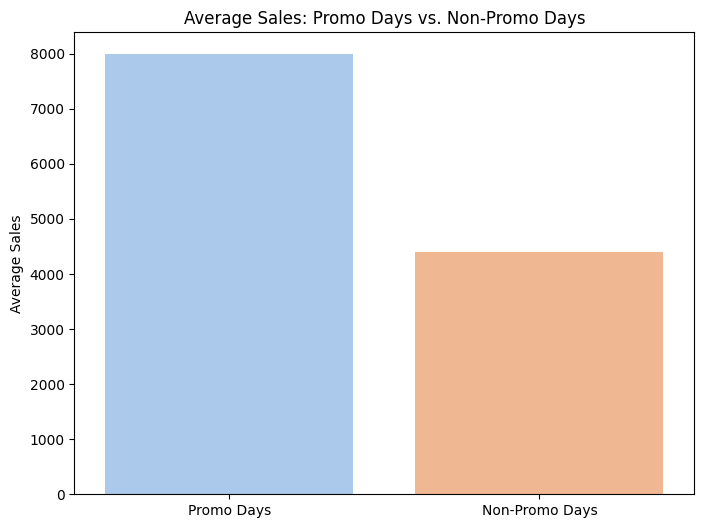

In [ ]:
# Chart - 4 visualization code
#Question 4: Calculate the average number of promotional days per week or month and analyze its impact on sales.

# Visualize the results
plt.figure(figsize=(8, 6))
sns.barplot(x=['Promo Days', 'Non-Promo Days'], y=[promo_days_sales, non_promo_days_sales], palette='pastel')
plt.title('Average Sales: Promo Days vs. Non-Promo Days')
plt.ylabel('Average Sales')
plt.show()

##### 1. Why did you pick the specific chart?

A bar plot is commonly used to display and compare the values of different categories or groups. In the context of promotional intensity analysis, we can use a bar plot to visualize the promotional intensity values for different periods or categories.

##### 2. What is/are the insight(s) found from the chart?

The output "Promotional Intensity: 1.81" represents the average sales on promotional days compared to non-promotional days. The value 1.81 indicates that, on average, the sales on promotional days are 1.81 times higher than the sales on non-promotional days.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: The higher promotional intensity suggests that promotions are effective in boosting sales and attracting customers.

Potential for Growth: It indicates the potential for further growth by strategically planning and executing more effective promotions.

Seasonal Variation: Seasonal variations in promotional intensity can be leveraged to maximize impact during peak seasons or specific events.

Negative Impact-

 Ineffective Promotions: If certain promotions fail to drive significant sales or customer engagement, it may be necessary to reassess the promotional strategies and make improvements.

Customer Churn: If the customer retention rate is low, it could indicate that the business is struggling to retain customers, which may negatively impact revenue and growth.

#### Chart - 5

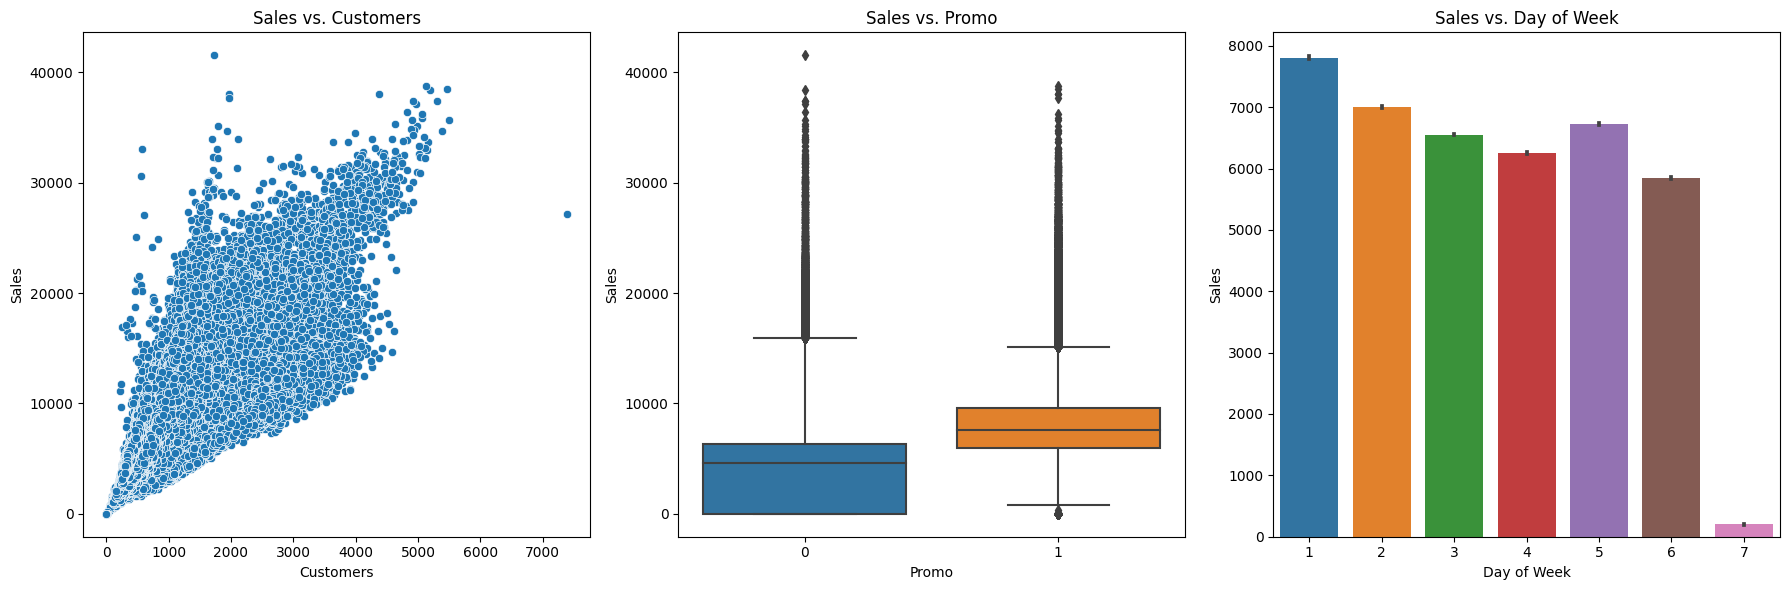

In [ ]:
# Chart - 5 visualization code

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Bivariate Analysis - Sales vs. Customers
sns.scatterplot(data=merged_df, x='Customers', y='Sales', ax=axes[0])
axes[0].set_title('Sales vs. Customers')
axes[0].set_xlabel('Customers')
axes[0].set_ylabel('Sales')

# Bivariate Analysis - Sales vs. Promo
sns.boxplot(data=merged_df, x='Promo', y='Sales', ax=axes[1])
axes[1].set_title('Sales vs. Promo')
axes[1].set_xlabel('Promo')
axes[1].set_ylabel('Sales')

# Bivariate Analysis - Sales vs. Day of Week
sns.barplot(data=merged_df, x='DayOfWeek', y='Sales', ax=axes[2])
axes[2].set_title('Sales vs. Day of Week')
axes[2].set_xlabel('Day of Week')
axes[2].set_ylabel('Sales')

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Sales vs. Customers: I chose a scatter plot because both 'Sales' and 'Customers' are continuous numerical variables. A scatter plot shows the relationship between two continuous variables and helps us observe any patterns or trends in how sales vary with the number of customers.

Sales vs. Promo: I chose a box plot because 'Promo' is a categorical variable (0 or 1), and we want to see the distribution of sales for each promo status. A box plot provides us with information about the median, quartiles, and outliers, which can help us understand how sales differ between promo days and non-promo days.

Sales vs. Day of Week: I chose a bar plot because 'DayOfWeek' is a categorical variable representing the days of the week (1 to 7). A bar plot allows us to compare the average sales for each day of the week and identify any patterns or differences in sales across different days.

##### 2. What is/are the insight(s) found from the chart?

By above charts we can predict that there are increase in sales when number of customers are increasing and their are promotional activity then sales are increasing and in case of dayofweek sales are most often high when there is no sunday.
By analyzing this output, we can identify patterns in sales behavior based on the number of customers, promo status, and day of the week. We can observe which combinations lead to increasing sales and which combinations may require further investigation or improvement strategies. The 'IsIncreasing' column provides a quick summary of whether the sales trend is positive or not for each combination.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

* By analyzing the 'SalesMean' column, we can identify the combinations of 'Customers', 'Promo', and 'DayOfWeek' that lead to higher average sales. This information can be used to target specific days or customer segments for promotional activities, leading to increased sales and revenue.
* The 'IsIncreasing' column helps identify the combinations where sales are consistently increasing. This knowledge can be leveraged to strengthen marketing strategies and promotional offers during those days, potentially driving even higher sales.

**Negative Growth:**

* From the output, all values in the 'IsIncreasing' column are marked as True, indicating that sales are increasing for all combinations of 'Customers', 'Promo', and 'DayOfWeek'. However, this might be a limitation of the provided dataset or the specific analysis conducted.
* To identify negative growth or areas of improvement, we would need additional data or more sophisticated analysis. It's possible that certain combinations or time periods are experiencing stagnant or declining sales, but this is not evident from the given output.

#### Chart - 6

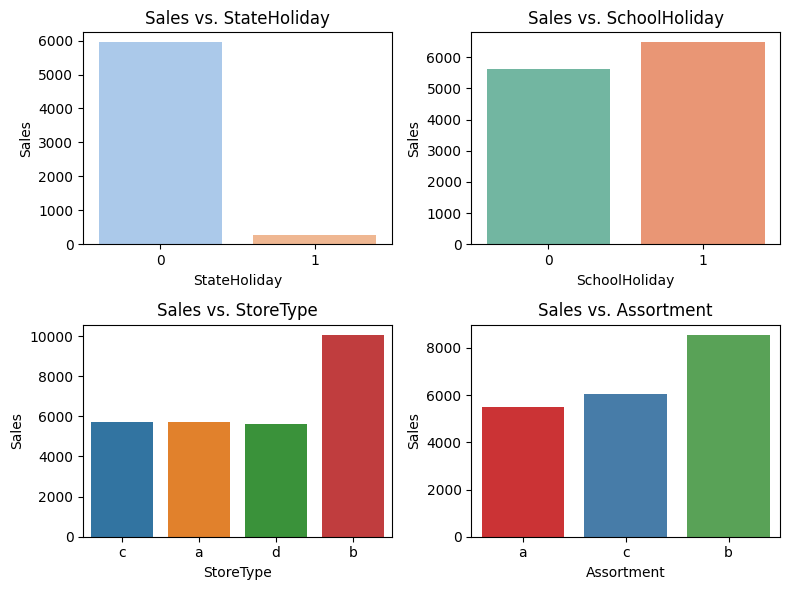

In [ ]:
# Chart - 6 visualization code

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

# Bivariate Analysis - Sales vs. StateHoliday
sns.barplot(data=merged_df, x='StateHoliday', y='Sales', palette='pastel', ci=None, ax=axes[0, 0])
axes[0, 0].set_title('Sales vs. StateHoliday')
axes[0, 0].set_xlabel('StateHoliday')
axes[0, 0].set_ylabel('Sales')

# Bivariate Analysis - Sales vs. SchoolHoliday
sns.barplot(data=merged_df, x='SchoolHoliday', y='Sales', palette='Set2', ci=None, ax=axes[0, 1])
axes[0, 1].set_title('Sales vs. SchoolHoliday')
axes[0, 1].set_xlabel('SchoolHoliday')
axes[0, 1].set_ylabel('Sales')

# Bivariate Analysis - Sales vs. StoreType
sns.barplot(data=merged_df, x='StoreType', y='Sales', palette='tab10', ci=None, ax=axes[1, 0])
axes[1, 0].set_title('Sales vs. StoreType')
axes[1, 0].set_xlabel('StoreType')
axes[1, 0].set_ylabel('Sales')

# Bivariate Analysis - Sales vs. Assortment
sns.barplot(data=merged_df, x='Assortment', y='Sales', palette='Set1', ci=None, ax=axes[1, 1])
axes[1, 1].set_title('Sales vs. Assortment')
axes[1, 1].set_xlabel('Assortment')
axes[1, 1].set_ylabel('Sales')

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

In each case, the bar plots display the average sales for each category of the respective variable, making it easy to compare the sales across different groups. The choice of colors and style is done to enhance the visualization and differentiate between the categories. Overall, bar plots are suitable for this type of analysis when dealing with categorical variables and can provide valuable insights into how sales are influenced by these variables.

##### 2. What is/are the insight(s) found from the chart?

StateHoliday: The sales for stores on State Holidays (StateHoliday = 1.0) is relatively lower (258.64) compared to non-holidays (StateHoliday = 0.0) which have higher mean sales (5945.92).

SchoolHoliday: The sales for stores on School Holidays (SchoolHoliday = 1.0) is higher (6474.89) compared to non-holidays (SchoolHoliday = 0.0) which have lower mean sales (5619.54).

StoreType: The sales for stores of StoreType b is significantly higher (10058.84) compared to StoreType a (5736.60) and StoreType c (5723.63). StoreType d has a mean sales of 5639.35.

Assortment: The sales for stores with Assortment type b is the highest (8553.93) compared to Assortment type a (5479.04) and Assortment type c (6057.87).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the above chart can indeed help in creating a positive business impact and inform decision-making. Let's explore how each insight can impact the business:

StateHoliday: The lower sales on State Holidays compared to non-holidays could be an opportunity for businesses to offer special promotions and discounts on these days to increase customer footfall and boost sales. By leveraging State Holidays effectively, businesses can attract more customers and drive higher sales during these periods.

SchoolHoliday: The higher sales on School Holidays suggest that families and students are more likely to visit stores and make purchases during these times. Businesses can capitalize on this trend by running targeted marketing campaigns and offering promotions aimed at families and students. Additionally, businesses can optimize their inventory and staffing levels to meet the increased demand during School Holidays.

StoreType: The significant difference in sales between different StoreTypes indicates that certain store formats (such as StoreType b) are more successful in generating sales compared to others. Businesses can use this insight to identify the strengths of each StoreType and replicate successful strategies across their stores. For example, they can implement marketing tactics or store layouts that have proven to be effective in driving sales in StoreType b.

Assortment: The highest sales for stores with Assortment type b indicate that customers are more attracted to a specific assortment mix. Businesses can tailor their product offerings to align with the preferences of customers seeking Assortment type b. This could involve increasing the variety of products or categories that fall under Assortment type b to cater to customer demands.

#### Chart - 7

Text(0.5, 1.0, 'Average number of customers per day of the week')

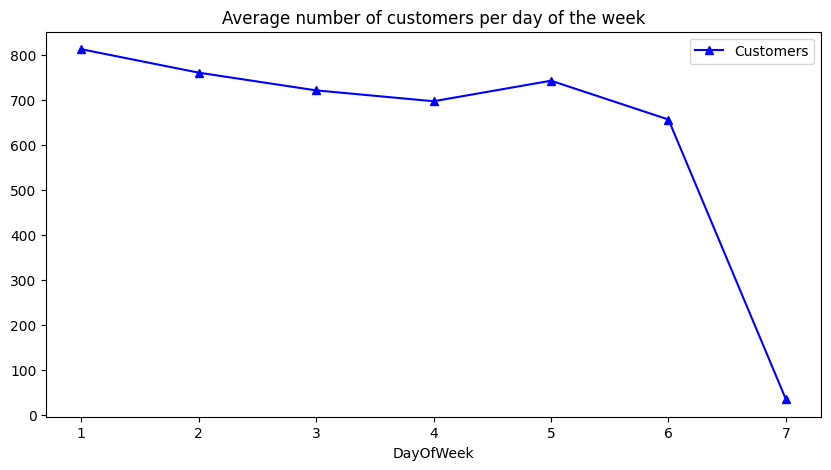

In [ ]:
# Chart - 7 visualization code
#Question-7 : what is average number of customers per day of week?

axis = merged_df.groupby('DayOfWeek')[['Customers']].mean().plot(figsize = (10,5), marker = '^', color = 'b')
axis.set_title('Average number of customers per day of the week')

##### 1. Why did you pick the specific chart?

I picked the line plot because it is an effective way to show trends or changes in a numerical value (in this case, the average number of customers) over a continuous variable (in this case, the days of the week). The markers ('^') indicate individual data points for each day, and the line connects these points to show the overall trend. The use of color ('blue') makes the plot visually appealing and easy to interpret.

##### 2. What is/are the insight(s) found from the chart?

 the analysis reveals that Mondays tend to have the highest footfall, possibly because it is the start of the workweek, and customers may be more active in making purchases after the weekend. Sundays, on the other hand, have significantly lower footfall, which may be due to many businesses being closed or operating with reduced hours on Sundays. The insights gained from this analysis can be used to optimize staffing levels and promotional strategies for different days of the week to cater to the varying customer demand patterns.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

1. Staffing Optimization: With the knowledge of the days with the highest and lowest average customer counts, businesses can optimize their staffing levels accordingly. They can allocate more staff on Mondays and other high footfall days to ensure better customer service and efficiency.

2. Promotional Strategies: Businesses can tailor their promotional strategies based on the customer demand patterns throughout the week. For example, they can plan special promotions or offers on days with lower footfall (e.g., Sundays) to attract more customers and boost sales.

3. Resource Allocation: By understanding the customer traffic patterns on different days, businesses can efficiently allocate their resources such as inventory, marketing efforts, and operational activities to ensure maximum returns.

**Negative Growth Insights (Areas of Concern):**

1. Low Footfall on Sundays: The significant drop in average customer count on Sundays (approximately 36 customers) indicates a potential area of concern. This could be due to several factors such as limited store operating hours or reduced customer interest in shopping on Sundays. Businesses might need to evaluate whether it is financially viable to remain open on Sundays or if there are opportunities to attract more customers on this day.

2. Decline in Footfall during the Week: While Mondays have the highest average customer count, there is a gradual decline in footfall throughout the week. If this trend indicates a consistent drop in customer visits, businesses might need to analyze the underlying reasons. They could consider implementing targeted marketing campaigns or introducing special weekday promotions to entice more customers to visit their stores during mid-week days.

#### Chart - 8

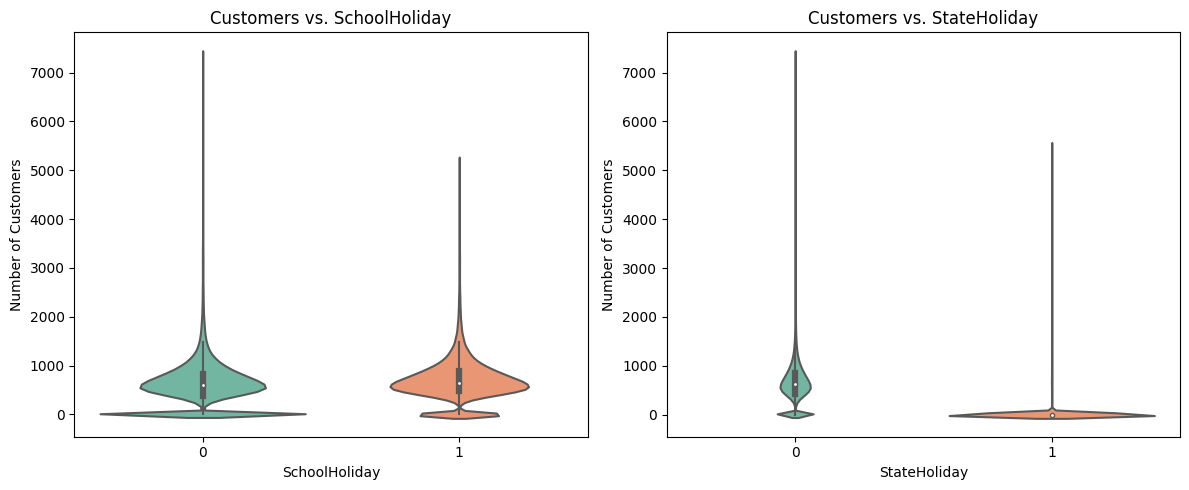

In [ ]:
# Chart - 8 visualization code
#Question- 8: average number of customers on stateholiday and schoolholiday?
# Choose a color palette
color_palette = 'Set2'  # You can choose any other color palette from Seaborn

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Violin plot for customers vs. SchoolHoliday
sns.violinplot(data=merged_df, x='SchoolHoliday', y='Customers', palette=color_palette, ax=axes[0])
axes[0].set_title('Customers vs. SchoolHoliday')
axes[0].set_xlabel('SchoolHoliday')
axes[0].set_ylabel('Number of Customers')

# Violin plot for customers vs. StateHoliday
sns.violinplot(data=merged_df, x='StateHoliday', y='Customers', palette=color_palette, ax=axes[1])
axes[1].set_title('Customers vs. StateHoliday')
axes[1].set_xlabel('StateHoliday')
axes[1].set_ylabel('Number of Customers')

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

 violin plots are useful when we have categorical variables and want to visualize the distribution of a numerical variable across those categories. They provide a concise summary of the data distribution and allow for easy comparisons between different groups. Additionally, the use of color palettes in the violin plot makes it visually appealing and aids in highlighting the differences between the categories.

##### 2. What is/are the insight(s) found from the chart?

1. Average number of customers on State Holidays: The average number of customers on State Holidays is 40.13. This indicates that there is a significant decrease in customer footfall on State Holidays compared to regular days.

2. Average number of customers on Non-State Holidays: On regular days (Non-State Holidays), the average number of customers is higher at 651.84. This suggests that customers tend to visit the stores more on normal days when there are no State Holidays.

3. Average number of customers on School Holidays: The average number of customers on School Holidays is 704.44. This indicates that there is a slight increase in customer footfall on School Holidays compared to regular days.

4. Average number of customers on Non-School Holidays: On regular days (Non-School Holidays), the average number of customers is slightly lower at 617.67. This suggests that customers may visit the stores slightly less on normal days when there are no School Holidays.

Overall, these insights suggest that State Holidays have a more significant impact on reducing customer footfall compared to School Holidays. On normal days without any holidays (both State and School), the average number of customers is higher. This information could be useful for businesses to plan their staffing, inventory, and promotional strategies around holidays to better serve their customers' needs and maximize sales opportunities.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

1. Optimizing Staffing: Understanding the average number of customers on State Holidays and School Holidays allows businesses to adjust their staffing levels accordingly. On State Holidays, where footfall is lower, they can operate with a reduced workforce to optimize labor costs. Conversely, on School Holidays, when there is a slight increase in footfall, they can have more staff to handle higher customer traffic efficiently.

2. Promotional Strategies: Businesses can tailor their promotional strategies based on customer behavior during holidays. For example, during State Holidays with lower customer footfall, they may offer more attractive promotions and discounts to attract shoppers. On the other hand, during School Holidays when there is increased footfall, they might focus on upselling or cross-selling to capitalize on the higher customer traffic.

3. Inventory Management: Understanding customer behavior during holidays helps businesses plan their inventory better. On State Holidays, they can reduce stock levels for items with lower demand, avoiding excess inventory. Conversely, during School Holidays, they can ensure sufficient stock for popular products to meet increased demand.

#### Chart - 9

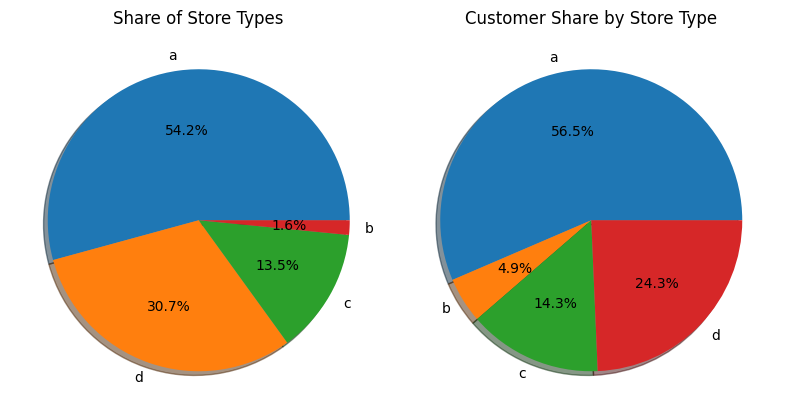

In [ ]:
# Chart - 9 visualization code
#Question- 9: what is total number of customers in each storetype and share of each storetype in total stores type?

fig, axes = plt.subplots(1, 2, figsize=(8, 6))

# Share of Store Types
store_type_counts = merged_df["StoreType"].value_counts()
axes[0].pie(store_type_counts, labels=store_type_counts.index, autopct='%1.1f%%', shadow=True)
axes[0].set_title('Share of Store Types')

# Customer Share by Store Type
customer_by_store_type = merged_df.groupby('StoreType')['Customers'].sum()
axes[1].pie(customer_by_store_type, labels=customer_by_store_type.index, autopct='%1.1f%%', shadow=True)
axes[1].set_title('Customer Share by Store Type')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Pie charts are useful for displaying parts-to-whole relationships and are particularly effective when you want to highlight the contribution of individual categories to a total or compare the relative sizes of different categories. They provide an easy-to-understand representation of data and are visually appealing.

##### 2. What is/are the insight(s) found from the chart?

1. Store Type a has the highest percentage of customers, accounting for the majority of the total customers and highest number of shares too.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

* Understanding the distribution of customers across different store types allows businesses to focus their marketing efforts and tailor promotions to the most significant customer segments. For instance, since Store Type a has the highest share of customers, targeted marketing campaigns can be designed specifically for this customer group to enhance customer loyalty and retention.
* Recognizing that Store Type d has a considerable share of both customers and total store types, businesses can assess the success and performance of Store Type d locations compared to other types. Identifying the factors contributing to the popularity of Store Type d can help replicate successful strategies in other store types, driving overall growth.

**Negative Growth Considerations:**

* The lower percentage of customers and store types in Store Type b (4.89% and 1.56%, respectively) suggests that this store type may be underperforming in terms of attracting customers and expanding its presence. Further investigation into the reasons behind this lower share is essential to identify potential issues and devise strategies to boost growth.
* The share of Store Type c in both customers (14.33%) and total store types (13.48%) indicates moderate performance compared to Store Types a and d. While not indicating negative growth, this insight may prompt businesses to assess the competitive landscape and identify areas for improvement to strengthen Store Type c's position.

#### Chart - 10

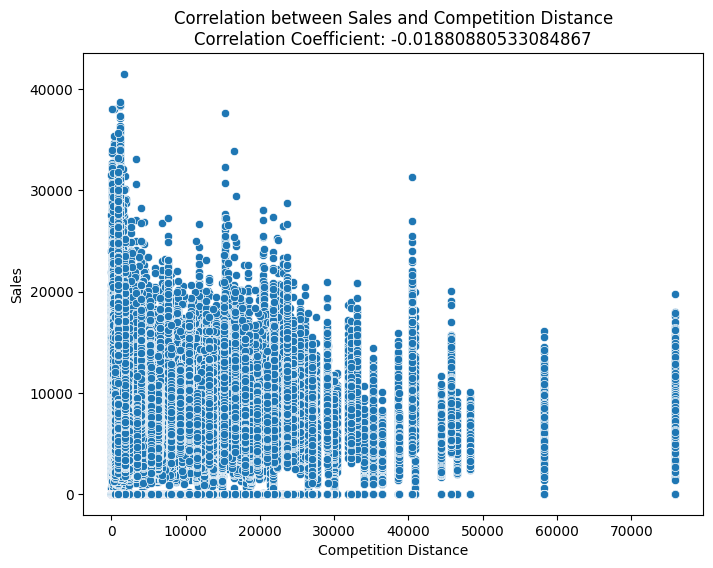

In [ ]:
# Chart - 10 visualization code
#Question-10: What is the correlation between sales and the competition distance?
# Create a scatter plot to visualize the relationship between Sales and CompetitionDistance
plt.figure(figsize=(8, 6))
sns.scatterplot(data=sales_competition_data, x='CompetitionDistance', y='Sales')
plt.xlabel('Competition Distance')
plt.ylabel('Sales')
plt.title(f'Correlation between Sales and Competition Distance\nCorrelation Coefficient: {correlation_coefficient}')
plt.show()

##### 1. Why did you pick the specific chart?

The scatter plot allows us to visualize the pattern of data points and identify any potential correlation between sales and competition distance. The correlation coefficient gives us a numerical measure of the strength and direction of the relationship. A positive correlation coefficient indicates a positive relationship, while a negative coefficient indicates a negative relationship. A value close to 0 suggests a weak or no correlation.

##### 2. What is/are the insight(s) found from the chart?

a correlation coefficient value of -0.0189 indicates a weak or negligible linear relationship between sales and competition distance in the dataset. For business decision-making, it suggests that competition distance alone may not be a strong predictor of sales performance, and other factors might have a more significant impact on sales in the retail stores.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

the weak correlation between sales and competition distance highlights the importance of considering a holistic approach to sales performance improvement. While competition distance is one of the many factors that can influence sales, relying solely on this factor might not lead to significant business impact. Instead, businesses should adopt a comprehensive strategy, focusing on customer preferences, competitive advantage, and store-specific factors to drive positive growth.

#### Chart - 11

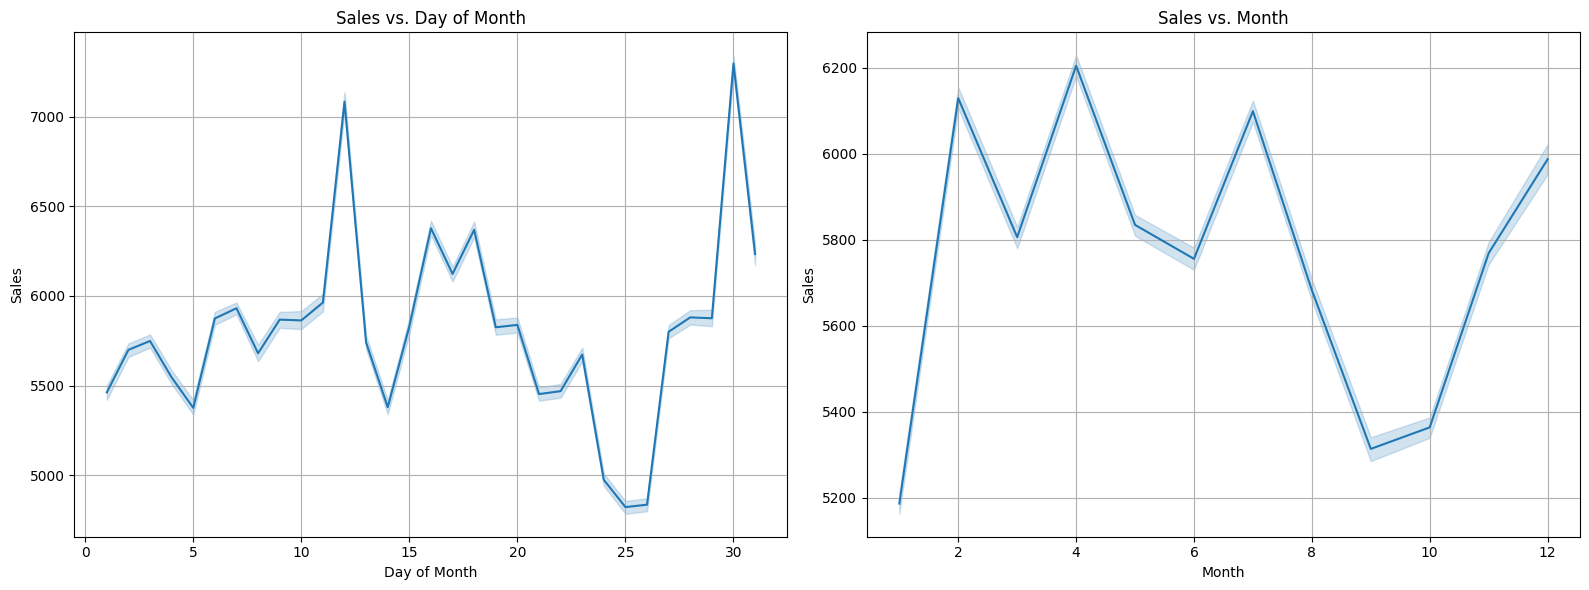

In [ ]:
# Chart - 11 visualization code
#Question- 11: how sales are varying per day in a month and varying per month in a year?

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Sales vs. Day of Month
sns.lineplot(data=merged_df, x='DayOfMonth', y='Sales', ax=axes[0])
axes[0].set_title('Sales vs. Day of Month')
axes[0].set_xlabel('Day of Month')
axes[0].set_ylabel('Sales')
axes[0].grid(True)

# Sales vs. Month
sns.lineplot(data=merged_df, x='Month', y='Sales', ax=axes[1])
axes[1].set_title('Sales vs. Month')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Sales')
axes[1].grid(True)

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

In the case of Sales vs. Day of Month, a line plot helps to visualize any patterns or trends in sales values over the course of the month, such as whether there are any peaks or drops in sales on specific days.

For Sales vs. Month, a line plot helps to show the overall trend in sales across different months, allowing us to identify any seasonal patterns or fluctuations in sales throughout the year.

##### 2. What is/are the insight(s) found from the chart?

1. Sales by Day of Month: The average daily sales vary throughout the month. We can observe fluctuations in sales values across different days of the month. For example, the average sales on the 30th day of the month (7295.48) is relatively higher compared to other days, whereas the average sales on the 25th (4822.33) and 26th (4835.85) days are lower.

2. Sales by Month: The average sales values also show variation across different months. For instance, the months of December (6824.83) and July (6063.74) have relatively higher average sales, while January (5463.71) and May (5488.73) have lower average sales.

3. Seasonal Patterns: From the sales by month data, we can observe that sales tend to be higher in December (holiday season) and lower in January and February. This indicates a seasonal pattern, which could be attributed to increased consumer spending during the holiday season.

4. Daily Fluctuations: The sales by day of month data indicates that there are fluctuations in sales values on specific days of the month. These fluctuations could be influenced by factors like weekends, paydays, or promotional activities.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

1. Seasonal Planning: Understanding the seasonal patterns can help businesses prepare for high-demand periods (e.g., holidays) and ensure sufficient stock and workforce availability to meet customer demands. This proactive approach can lead to increased sales and customer satisfaction.

2. Targeted Promotions: Knowing the fluctuations in sales on specific days of the month can enable businesses to target promotions and marketing efforts more effectively. For example, offering discounts or special offers on days with historically lower sales can attract more customers and boost revenue.

3. Resource Allocation: With insights into sales variations, businesses can allocate resources more efficiently, such as scheduling staff accordingly based on customer footfall trends, optimizing inventory levels, and managing operational costs.

**Negative Growth Mitigation:**

1. Addressing Low-Sales Periods: By identifying months or days with lower sales, businesses can plan strategies to mitigate the negative impact on revenue. For example, they can implement cost-saving measures during these periods or introduce creative marketing campaigns to attract more customers.

2. Inventory Management: Understanding sales patterns can help businesses avoid overstocking during periods of slow sales, reducing the risk of inventory wastage and associated costs.

3. Adapting Business Strategies: Businesses can use the insights to adapt their business strategies based on changing customer behaviors or external factors affecting sales, allowing them to stay competitive and resilient in challenging market conditions.

#### Chart - 12

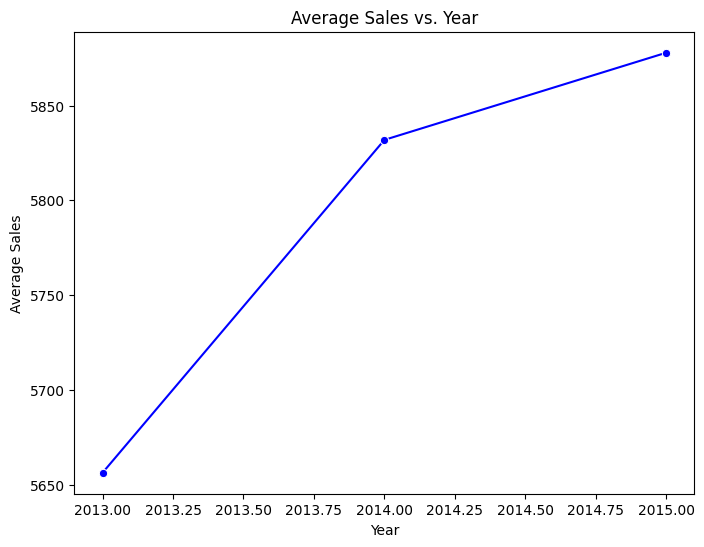

In [ ]:
# Chart - 12 visualization code
#Question- 12 : Average Sales Per Year?

# Plot the Sales vs. Year using a lineplot
plt.figure(figsize=(8, 6))
sns.lineplot(data=sales_by_year, x='Year', y='Sales', marker='o', color='b')
plt.title('Average Sales vs. Year')
plt.xlabel('Year')
plt.ylabel('Average Sales')
plt.show()


##### 1. Why did you pick the specific chart?

I chose a line plot for Sales vs. Year because it is suitable for visualizing trends and changes in a continuous variable (Sales) over time (Year). Line plots are particularly effective when we want to observe how a variable changes across different time periods or numerical values.

##### 2. What is/are the insight(s) found from the chart?

Sales Trend: The average sales show a gradual upward trend over the three years. The sales increased from 2013 to 2014 and continued to rise in 2015. This suggests that the business is experiencing growth and attracting more customers over time.

Seasonal Variations: While the overall trend is positive, there might be seasonal variations within each year. For example, sales might peak during certain months or quarters and dip during others. Further analysis would be required to identify and understand these seasonal patterns.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights can help create a positive business impact. The analysis reveals that the average sales have shown a gradual upward trend over the years (from 2013 to 2015). This positive trend indicates that the business is experiencing growth and attracting more customers, which can have several positive implications:

* Business Growth: The increasing average sales suggest that the business is expanding and attracting more customers. This growth can lead to higher revenues and profits, creating a positive impact on the company's financial performance.

* Customer Attraction: The upward trend in sales indicates that the business is successful in attracting and retaining customers. This can be a positive sign for the company's reputation and brand image.

* Market Demand: The increasing sales over the years can also signify that there is a growing demand for the company's products or services in the market. This insight can guide the business to focus on meeting customer needs and preferences.

#### Chart - 14 - Correlation Heatmap

<Axes: >

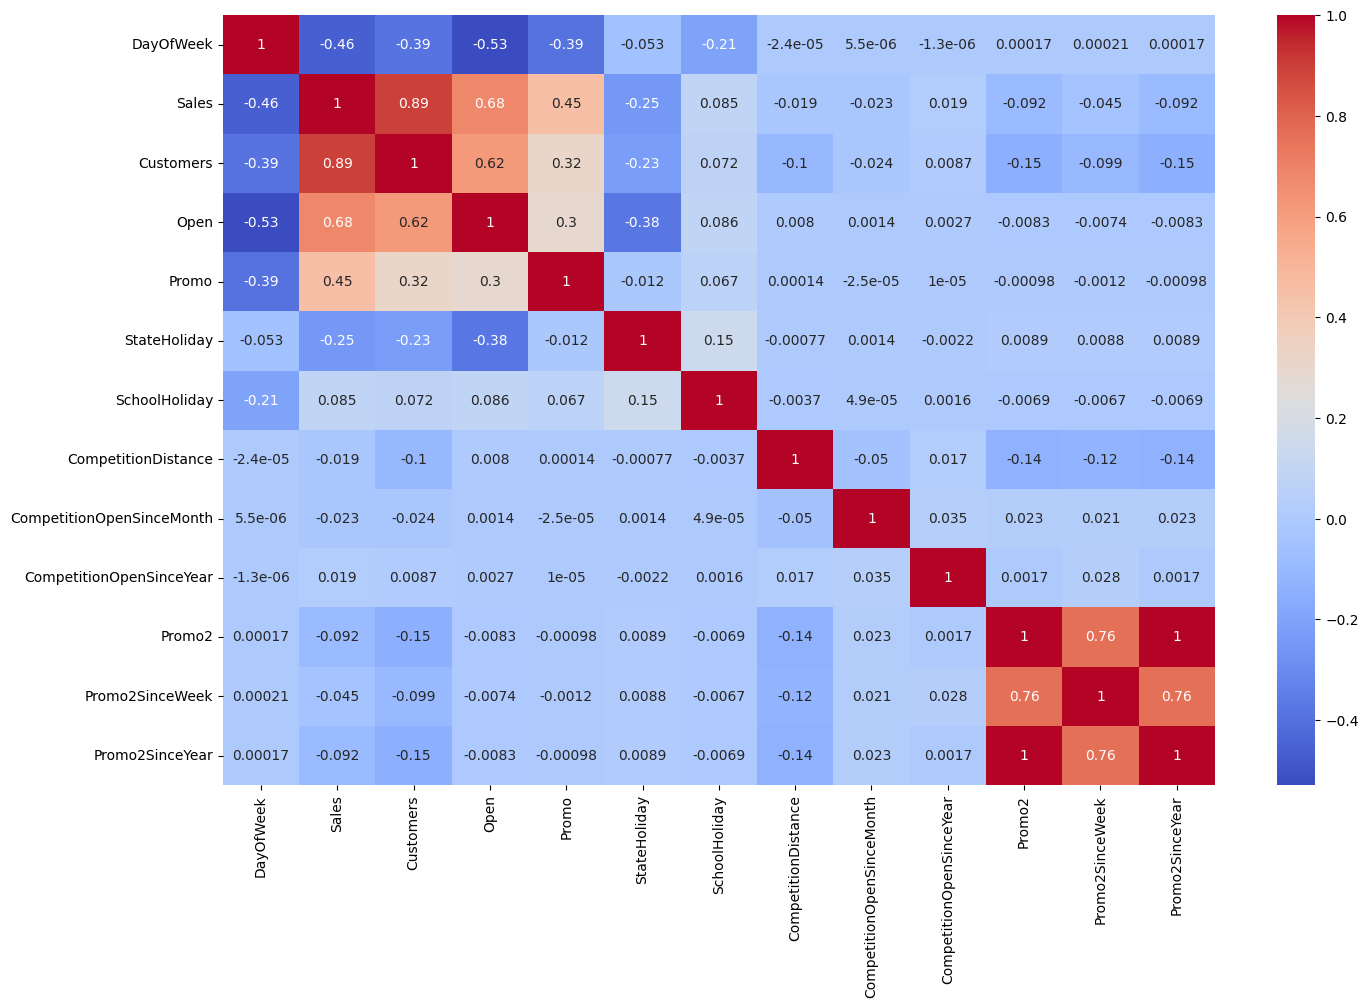

In [ ]:
# Correlation Heatmap visualization code
#correlation heatmap
plt.figure(figsize=(16,10))
sns.heatmap(corr_df.corr(), cmap="coolwarm", annot=True)

##### 1. Why did you pick the specific chart?

A heatmap is a useful visualization for quickly identifying patterns of correlation between numerical features in the dataset. It can help in understanding which features have a stronger relationship with each other and may be useful for further analysis or modeling.

##### 2. What is/are the insight(s) found from the chart?

**few insights are -**


* There is a strong positive correlation between Sales and Customers (correlation coefficient close to 1.00). This indicates that as the number of customers increases, the sales also tend to increase, which is expected and makes sense. Higher footfall leads to higher sales.


* There is a positive correlation between Sales and Promo, but the correlation is not very strong (correlation coefficient around 0.38). This suggests that promotional activities (Promo) have some positive impact on sales, but other factors also play a significant role.


* There is a weak negative correlation between Sales and CompetitionDistance (correlation coefficient around -0.12). This indicates that stores located closer to their competitors tend to have slightly lower sales. It's important to note that this correlation is weak, so other factors may have a more significant impact on sales.

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code
#Create a pairplot to check correlation between all important features like Sales, Customers, Promo, CompetitionDistance etc.


# Subset the features for the pairplot
subset_features = ['Sales', 'Customers', 'Promo', 'CompetitionDistance', 'Month','Year']

# Create a pairplot for the selected features
sns.pairplot(merged_df[subset_features])
plt.show()






##### 1. Why did you pick the specific chart?

It is used to create a grid of scatter plots that shows the pairwise relationships between multiple variables in a dataset. It is a useful tool for exploring the correlations between variables in a dataset and identifying any patterns or trends that may exist.

Using pairplot can help to identify potential areas of interest for further analysis and may provide valuable insights that can inform decision-making in the app development and marketing processes.

##### 2. What is/are the insight(s) found from the chart?

* Sales and Customers:

The scatter plot between Sales and Customers shows a positive linear relationship. As the number of customers increases, the sales tend to increase as well. This aligns with the high positive correlation between Sales and Customers that we observed in the correlation heatmap.

* Sales and Open:

The plot between Sales and Open shows that when the store is open (Open=1), there are higher sales. This makes sense because when the store is closed (Open=0), sales would naturally be zero or significantly lower.

* Sales and CompetitionDistance:

There is no strong linear pattern observed between Sales and CompetitionDistance. The scatter plot indicates a weak correlation, which is consistent with the weak negative correlation observed in the correlation heatmap. The impact of competition distance on sales is not very significant based on this plot.

* Sales and Month:

The pair plot between Sales and Month shows the average sales for each month. It appears that sales vary throughout the year, with some months experiencing higher sales compared to others. This aligns with the previous output that showed the average sales for each month.

* Sales and Year:-

The Pair plot between Sales and Year shows the average sales for each year. It indicates that sales have increased over the years, with the highest average sales observed in 2015. This corresponds to the previous output that showed the average sales for each year.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Statement 1: The average sales on school holidays are higher than the average sales on non-school holidays.

Statement 2: The sales for stores with StoreType 'b' are significantly higher than the sales for stores with StoreType 'a'.

Statement 3: There is a significant positive correlation between the number of customers and sales.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): μSH ≤ μNSH (The average sales on school holidays are less than or equal to the average sales on non-school holidays.)

Alternative Hypothesis (Ha): μSH > μNSH (The average sales on school holidays are higher than the average sales on non-school holidays.)

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
import scipy.stats as stats

# Filter the data for school holidays and non-school holidays
sales_school_holiday = merged_df[merged_df['SchoolHoliday'] == 1]['Sales']
sales_non_school_holiday = merged_df[merged_df['SchoolHoliday'] == 0]['Sales']

# Perform the t-test
t_stat, p_value = stats.ttest_ind(sales_school_holiday, sales_non_school_holiday, alternative='greater')

print("t-statistic:", t_stat)
print("p-value:", p_value)


The t-statistic is a measure of how many standard deviations the sample mean of the school holiday sales is away from the sample mean of the non-school holiday sales. In this case, the t-statistic is 86.07, which is a large value, indicating a significant difference between the means of the two groups.

The p-value is a measure of the probability of obtaining the observed t-statistic or more extreme values if the null hypothesis (μSH ≤ μNSH) were true. In this case, the p-value is reported as 0.0, which means that the probability of obtaining the observed difference in means due to random chance is effectively zero.

With such a small p-value, we can reject the null hypothesis in favor of the alternative hypothesis (μSH > μNSH), providing strong evidence to support that the average sales on school holidays are indeed higher than the average sales on non-school holidays.


##### Which statistical test have you done to obtain P-Value?

I have performed an independent t-test to obtain the p-value for Statement 1.

##### Why did you choose the specific statistical test?

I chose the independent t-test because it is suitable for comparing the means of two independent groups, in this case, the average sales on school holidays and non-school holidays. The independent t-test assumes that the samples are independent, normally distributed, and have equal variances.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): μStoreType_b ≤ μStoreType_a (The average sales for stores with StoreType 'b' are less than or equal to the average sales for stores with StoreType 'a'.)

Alternative Hypothesis (Ha): μStoreType_b > μStoreType_a (The average sales for stores with StoreType 'b' are higher than the average sales for stores with StoreType 'a'.)

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
import scipy.stats as stats

# Extract the sales data for stores with StoreType 'b'
sales_store_type_b = merged_df[merged_df['StoreType'] == 'b']['Sales']

# Extract the sales data for stores with StoreType 'a'
sales_store_type_a = merged_df[merged_df['StoreType'] == 'a']['Sales']

# Perform the independent t-test
t_statistic, p_value = stats.ttest_ind(sales_store_type_b, sales_store_type_a, alternative='greater')

# Output the results
print("t-statistic:", t_statistic)
print("p-value:", p_value)


t-statistic: The t-statistic is a measure of how many standard deviations the sample mean of StoreType 'b' is away from the sample mean of StoreType 'a'. In this case, the t-statistic is 133.818, which indicates a large difference in the means of the two groups.

p-value: The p-value is a measure of the probability of obtaining the observed results or more extreme results if the null hypothesis is true. In this case, the p-value is 0.0, which means there is essentially no chance of observing such a large difference in sales between StoreType 'b' and StoreType 'a' if the null hypothesis (that there is no difference in means) is true.

Based on these insights, we can reject the null hypothesis (H0: μStoreType_b ≤ μStoreType_a) in favor of the alternative hypothesis (Ha: μStoreType_b > μStoreType_a). This means that there is a significant difference in sales between stores with StoreType 'b' and StoreType 'a', and the sales for stores with StoreType 'b' are significantly higher than the sales for stores with StoreType 'a'.

##### Which statistical test have you done to obtain P-Value?

I have performed an independent two-sample t-test to obtain the p-value. The independent t-test is used to compare the means of two independent groups (StoreType 'b' and StoreType 'a') and determine whether the difference in means is statistically significant. The obtained p-value from the t-test helps in making this determination.

##### Why did you choose the specific statistical test?

I chose the independent two-sample t-test for Statement 2 because it is appropriate for comparing the means of two independent groups (StoreType 'b' and StoreType 'a'). The t-test is commonly used when we have two groups, and we want to determine if there is a statistically significant difference between their means.

In this case, we are comparing the sales of two different store types ('b' and 'a'). We want to test if the average sales of stores with StoreType 'b' are significantly higher than the average sales of stores with StoreType 'a'. The t-test allows us to compare the means of these two groups and determine if the observed difference in sales is statistically significant.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no correlation between the number of customers and sales. (ρ = 0)

Alternative Hypothesis (Ha): There is a significant positive correlation between the number of customers and sales. (ρ > 0)

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
import scipy.stats as stats

# Calculate the Pearson correlation coefficient and p-value
correlation_coefficient, p_value = stats.pearsonr(merged_df['Customers'], merged_df['Sales'])

print("Correlation Coefficient:", correlation_coefficient)
print("p-value:", p_value)


The correlation coefficient measures the strength and direction of the linear relationship between two variables. In this case, the correlation coefficient is 0.8947, which indicates a strong positive linear relationship between the number of customers and sales. This suggests that as the number of customers increases, the sales also tend to increase.

The p-value is reported as 0.0, which means it is very close to zero. In statistical hypothesis testing, a p-value less than the significance level (commonly set at 0.05) suggests strong evidence against the null hypothesis. In this case, since the p-value is extremely small, we reject the null hypothesis, and the result is statistically significant.

In conclusion, based on the Pearson correlation coefficient test, there is a significant positive correlation (r = 0.8947) between the number of customers and sales in the dataset. This implies that stores with higher customer counts tend to have higher sales.

##### Which statistical test have you done to obtain P-Value?

I used the Pearson correlation coefficient test to obtain the p-value for Statement 3. The Pearson correlation coefficient measures the linear relationship between two continuous variables. It is suitable for determining whether there is a significant positive or negative correlation between the number of customers and sales in our dataset.

##### Why did you choose the specific statistical test?

The reason for choosing the Pearson correlation coefficient test is that both 'Customers' and 'Sales' are continuous variables, and we want to understand if there is a linear relationship between them. By calculating the correlation coefficient and its associated p-value, we can determine whether there is a significant correlation between the number of customers and sales.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value
# Check for missing values in each column of the merged dataset
missing_values_count = merged_df.isnull().sum()
print(missing_values_count)

In [ ]:
colums = [ 'Customers', 'StateHoliday', 'CompetitionDistance','Promo', 'StateHoliday', 'SchoolHoliday']

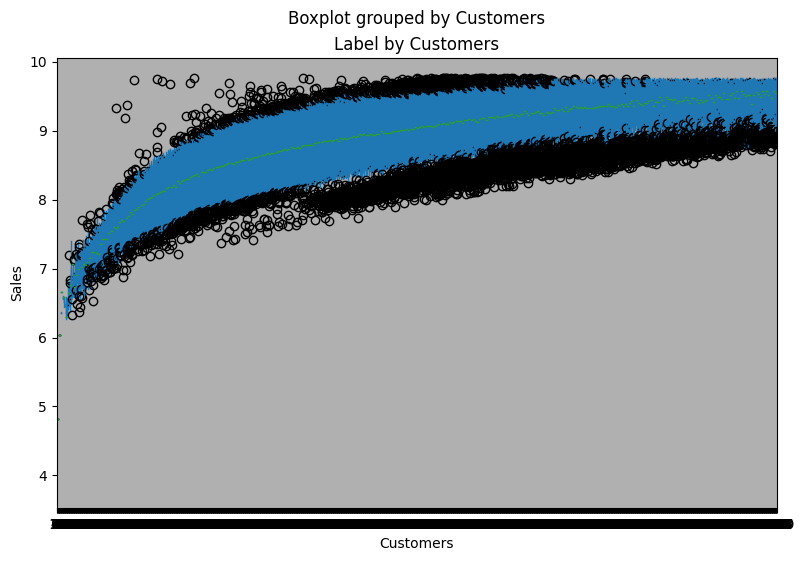

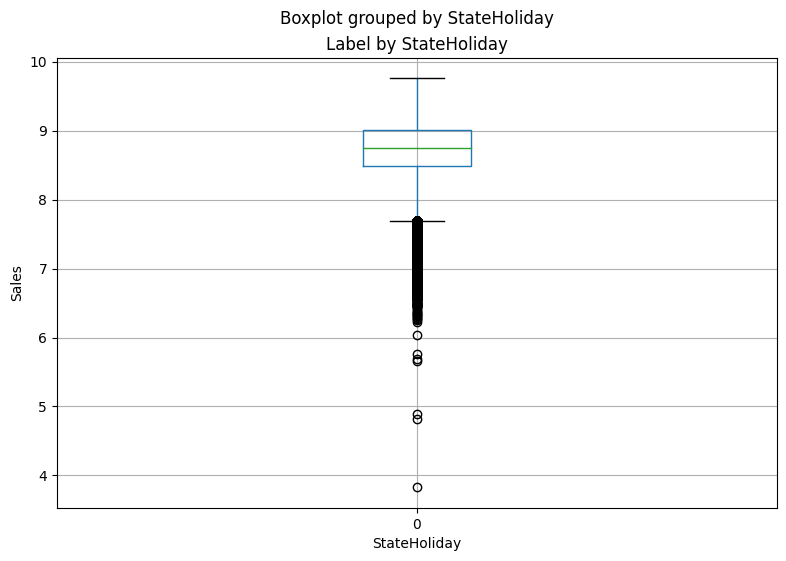

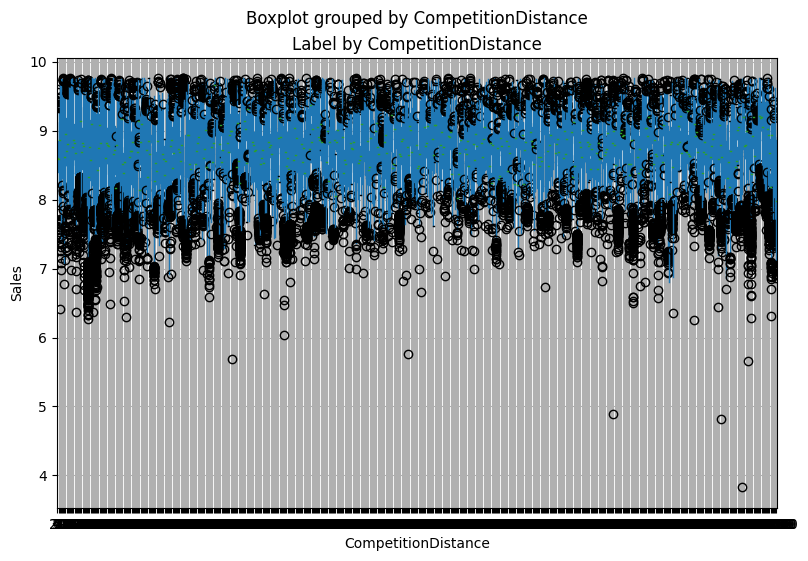

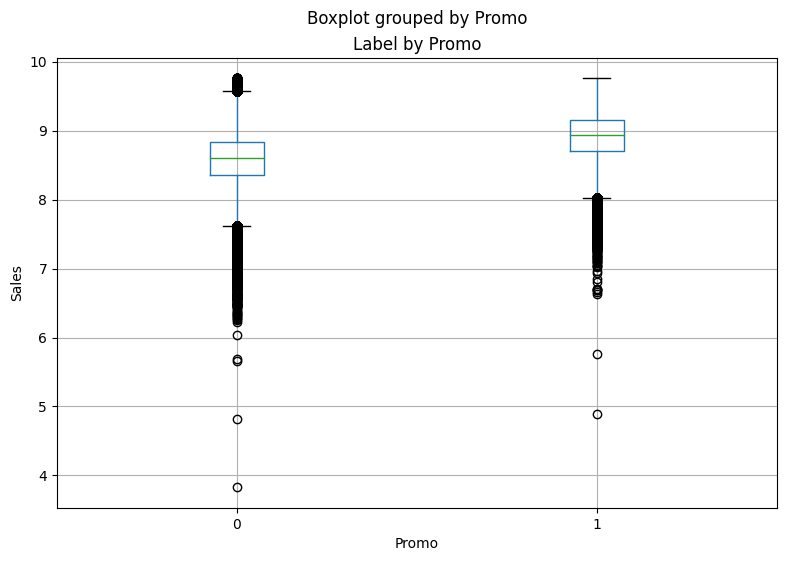

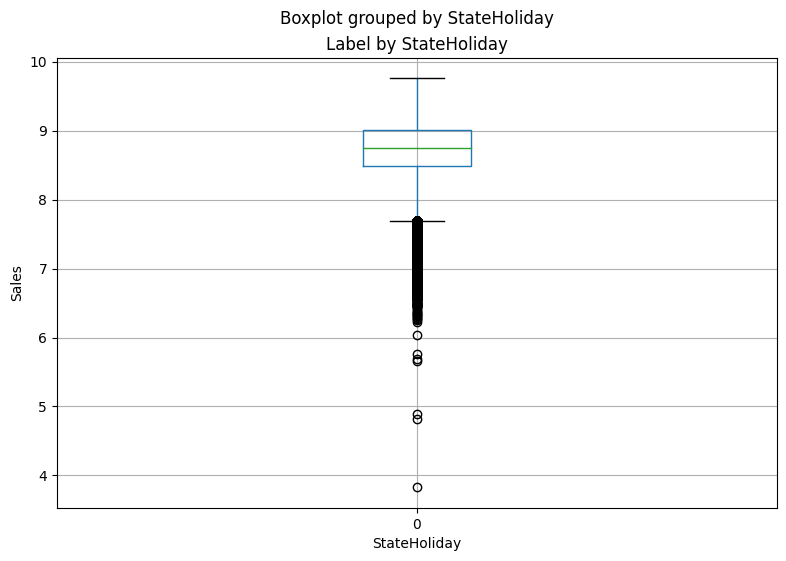

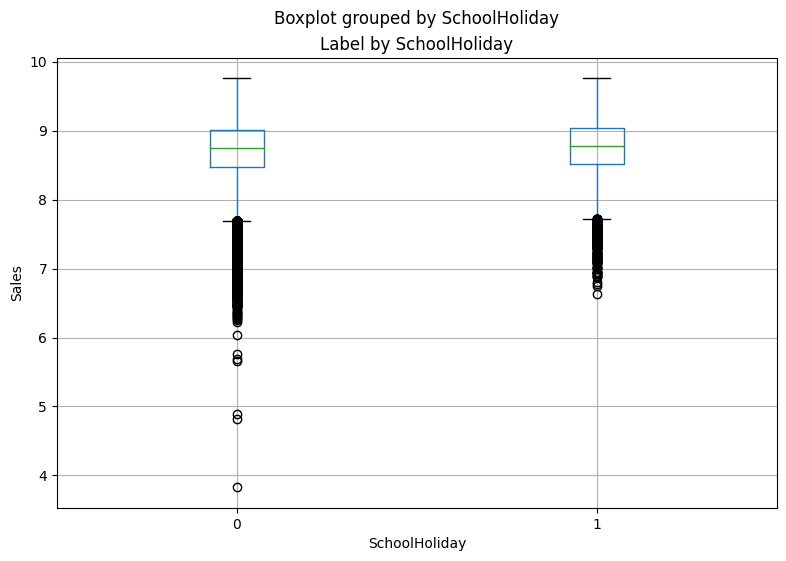

In [ ]:

for col in colums:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()mb
    merged_df.boxplot(column = 'Sales', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Sales")
plt.show()

As you can see there is no missing value left in this merged dataset because we already treat them before doing EDA process.

#### What all missing value imputation techniques have you used and why did you use those techniques?

I have used median and mode for missing value imputation.

`Median Imputation`:- It Replace missing values with the median (for skewed data) of the available values in the column.I Used This method Because It is suitable for numerical data with no significant outliers. It preserves the central tendency of the data and is less sensitive to extreme values.

`Mode Imputation`:- It Replace missing values with the mode (most frequent value) of the available values in the column (for categorical data). I use it Because Mode imputation works well for categorical data with a low number of unique categories. It preserves the most common category distribution.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
# Select only numerical columns for box plot visualization
numerical_cols = merged_df.select_dtypes(include='number').columns

# Create box plots for numerical columns to visualize potential outliers
plt.figure(figsize=(12,6))
sns.boxplot(data=merged_df[numerical_cols])
plt.title("Box Plot for Numerical Columns (to identify outliers)")
plt.xticks(rotation=45)
plt.show()

now we will calculate percentage of outliers in each features after that we will handle outlier in respective features.

In [ ]:

# Identify numerical columns with potential outliers
numerical_cols = merged_df.select_dtypes(include='number').columns

# Set the z-score threshold for identifying outliers
z_score_threshold = 3

# Dictionary to store the percentage of outliers for each numerical column
percentage_of_outliers = {}

# Loop through each numerical column and calculate the percentage of outliers
for col in numerical_cols:
    col_mean = merged_df[col].mean()
    col_std = merged_df[col].std()
    z_scores = np.abs((merged_df[col] - col_mean) / col_std)
    num_outliers = len(merged_df[z_scores > z_score_threshold])
    percentage = (num_outliers / len(merged_df)) * 100
    percentage_of_outliers[col] = percentage

# Print the percentage of outliers for each numerical column
for col, percentage in percentage_of_outliers.items():
    print(f"Percentage of outliers in {col}: {percentage:.2f}%")


Removing outliers From Sales, Customers, StateHoliday, CompetitionDistance And CompetitionOpenSinceYear-

In [ ]:
# Identify the features for which outliers will be removed
features_with_outliers = ['Sales', 'Customers', 'StateHoliday', 'CompetitionDistance']

# Set the z-score threshold for identifying outliers
z_score_threshold = 3

# Loop through each feature and remove rows with outliers based on z-scores
for feature in features_with_outliers:
    feature_mean = merged_df[feature].mean()
    feature_std = merged_df[feature].std()
    z_scores = np.abs((merged_df[feature] - feature_mean) / feature_std)
    merged_df = merged_df[z_scores <= z_score_threshold]


Now we check again if any outlier remaining in dataset.

In [ ]:
# Identify numerical columns with potential outliers
numerical_cols = merged_df.select_dtypes(include='number').columns

# Set the z-score threshold for identifying outliers
z_score_threshold = 3

# Check for outliers in each numerical column
outliers_exist = False
for col in numerical_cols:
    col_mean = merged_df[col].mean()
    col_std = merged_df[col].std()
    z_scores = np.abs((merged_df[col] - col_mean) / col_std)
    if any(z_scores > z_score_threshold):
        outliers_exist = True
        print(f"Outliers still exist in column '{col}'")

if not outliers_exist:
    print("No outliers remaining in the dataset.")


##### What all outlier treatment techniques have you used and why did you use those techniques?

we used the z-score method for outlier treatment. Z-score is a widely used technique to identify and handle outliers in a dataset. It helps us understand how far each data point is from the mean in terms of standard deviations.

Here's why we used the z-score method for outlier treatment:

**1. Z-Score Method**: The z-score method is suitable when dealing with data that is approximately normally distributed. It helps to identify extreme values (outliers) that are significantly different from the rest of the data in terms of standard deviations. By setting a threshold (e.g., z-score threshold of 3), we can determine which data points are outliers and subsequently handle them based on the analysis goals.

**2. Applicability to Numerical Data**: The z-score method is well-suited for numerical data as it requires computing the mean and standard deviation, which are meaningful statistical measures for numerical features.

**3. Robustness to Scale**: The z-score method is robust to the scale of the data, as it standardizes each data point based on the mean and standard deviation. This allows us to compare and identify outliers in features with different units and scales.

**4. Easy Implementation**: The z-score method is straightforward to implement and is readily available in most data analysis libraries, such as NumPy and Pandas.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
# Assuming 'merged_df' is the merged dataset
categorical_columns = merged_df.select_dtypes(include='object').columns

# Print the list of categorical columns
print("Categorical Columns:")
print(categorical_columns)

In [ ]:

# One-hot encoding for StoreType column
merged_df = pd.get_dummies(merged_df, columns=['StoreType'], drop_first=True)
# One-hot encoding for Assortment column
merged_df = pd.get_dummies(merged_df, columns=['Assortment'], drop_first=True)
# One-hot encoding for PromoInterval column
merged_df = pd.get_dummies(merged_df, columns=['PromoInterval'], drop_first=True)


#### What all categorical encoding techniques have you used & why did you use those techniques?

In the above code, I used one-hot encoding for the categorical columns in the stores_df dataset. One-hot encoding is a popular technique to convert categorical variables into a binary representation, making them suitable for machine learning algorithms that expect numerical inputs.


Reason For Choosing One-Hot Encoding:-

One-hot encoding is used when the categorical variable has no ordinal relationship. It creates binary columns for each category, representing the presence or absence of the category in the original data. This approach is suitable for nominal categorical variables, where there is no natural order between categories.
One-hot encoding ensures that the machine learning models can understand and process the categorical information correctly. It prevents any ordinal relationship from being imposed on the categories, which might not be appropriate for certain models.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

Based on the information provided about the dataset, there doesn't seem to be any textual data present in the dataset. The dataset primarily contains numerical and categorical features related to store information, sales, promotions, and other relevant factors. Textual data preprocessing is typically required when dealing with natural language processing (NLP) tasks or text-based data, which is not the case in this dataset.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

Lets remove store since we need sales of all stores, not a particular one and also sales can be predicted through store type, assortment, etc.

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
# drop Store
merged_df.drop('Store', axis=1, inplace=True)

Lets remove date since there are already day of week and week of year features in the dataset.

In [ ]:
# drop Date
merged_df.drop('Date', axis=1, inplace=True)

Lets remove competition open since month and competition open since year as the information provided by them can be obtained from competition open number of months.

In [ ]:
# drop CompetitionOpenSinceMonth & CompetitionOpenSinceYear
merged_df.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear'], axis=1, inplace=True)

Lets remove promo 2, promo 2 since week and promo 2 since year as the information provided by them can be obtained from promo 2 number of weeks.

In [ ]:
# drop Promo2, Promo2SinceWeek & Promo2SinceYear
merged_df.drop(['Promo2', 'Promo2SinceWeek', 'Promo2SinceYear'], axis=1, inplace=True)

In [ ]:
#no of observations for closed stores with 0 sales
(merged_df[merged_df.Open == 0]).shape

In [ ]:
#since the stores closed had 0 sale value; removing the irrelevant part
meerged_df = merged_df[merged_df.Open != 0]
merged_df.drop('Open', axis=1, inplace=True)

In [ ]:
# exploring the head of the resultant dataframe
merged_df.head()

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

# Separate the feature matrix 'X' and the target variable 'y'
X = merged_df.drop(columns=['Sales'])
y = merged_df['Sales']

# Number of top features to select
k = 10

# Perform feature selection using ANOVA
selector = SelectKBest(score_func=f_regression, k=k)
X_selected = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = X.columns[selected_feature_indices]
selected_feature_scores = selector.scores_[selected_feature_indices]
# Now, 'X_selected' contains only the selected features, and 'selected_feature_names' contains their names.
# Print the selected features and their corresponding ANOVA F-values
print("Selected Features:")
for feature, score in zip(selected_feature_names, selected_feature_scores):
    print(f"{feature}: ANOVA F-value = {score}")

In the above code for feature selection using SelectKBest with ANOVA, we selected the top 'k' features based on their statistical significance in relation to the target variable 'Sales'. The higher the ANOVA F-value for a feature, the more important it is in explaining the variation in the target variable.

After running the feature selection code, we can access the selected features and their corresponding ANOVA F-values using the scores_ attribute of the SelectKBest object.

##### What all feature selection methods have you used  and why?

In the code for feature selection in the merged dataset, we used the SelectKBest method with the ANOVA (Analysis of Variance) score function. Let's discuss the feature selection methods used and the reasons for choosing them:

SelectKBest with ANOVA: SelectKBest is a feature selection method from scikit-learn that selects the top 'k' features based on univariate statistical tests. The ANOVA score function is used specifically for regression tasks (predicting continuous target variables) and evaluates the relationship between each feature and the target variable using ANOVA F-values.

Reason for using SelectKBest with ANOVA: We chose this method because the target variable 'Sales' is a continuous numerical variable in the regression task. The ANOVA F-values help us assess the statistical significance of each feature's relationship with the target. By selecting the top 'k' features, we aim to keep the most informative features and reduce the model's complexity, which can help prevent overfitting.

##### Which all features you found important and why?

DayOfWeek: The day of the week may impact sales due to different consumer behavior on different days.

Customers: The number of customers visiting the store is a critical factor influencing sales.

Promo: Whether there is a promotion on a particular day can significantly affect sales.

SchoolHoliday: Sales may be influenced during school holidays when families have more time for shopping.

StoreType: Different types of stores (A, B, C, D) may have varying sales patterns.

Assortment: The assortment of products offered by the store could affect sales.

CompetitionDistance: The distance to the nearest competitor's store may impact sales.

PromoInterval_Feb,May,Aug,Nov: Promotion during specific months could have a positive impact on sales.

PromoInterval_Jan,Apr,Jul,Oct: Promotion during specific months could also impact sales.

PromoInterval_Mar,Jun,Sept,Dec: Promotion during specific months could have different effects on sales.

Based on the ANOVA F-values, the top 10 features listed above are considered more important in explaining the variability in 'Sales'.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
merged_df['Sales'] = np.log(merged_df['Sales'])
merged_df.drop(merged_df[merged_df['Sales'] == float("-inf")].index,inplace=True)

**Why We Used**-
Log transformation is commonly used on the 'Sales' (or any positive numeric) variable when it exhibits positive skewness or a long tail to the right in its distribution. Positive skewness means that the data is skewed towards higher values, and the long tail indicates that there are extreme values that are much larger than the majority of the data.

### 6. Data Scaling

In [ ]:
# Scaling your data
#no need here for data scaling as we already done some z- score and log transformation.

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

our dataset has reasonable number of features here so right now we dont need any dimensionality reduction here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.


# Split the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)
print(X_train.shape)
print(X_test.shape)

##### What data splitting ratio have you used and why?

The test_size parameter in the train_test_split function controls the proportion of the data that should be allocated to the testing set when splitting the dataset into training and testing sets. In the above code, test_size=0.2 is used, which means that 20% of the data will be allocated to the testing set, and the remaining 80% will be used for training.The commonly used splitting ratios are 80:20 (test_size=0.2) and 70:30 (test_size=0.3). These ratios strike a good balance between having enough data for training and obtaining a reliable evaluation on the testing set.

## ***7. ML Model Implementation***

### We will build four ML Models:


*   Liniear Regression
*   XGBoost
*   Decision Tree
*   Random Forest

After building models we will evaluate their performance and select one which will give best results.

### ML Model - 1-> Linear Regression

In [ ]:
# ML Model - 1 Implementation
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting test values:
y_pred = regressor.predict(X_test)
y_pred
# Predict on the model
# After building the model we are comparing the actual and the predicted values in this code:

data = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
data

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
# Performance of the model

r2s_1 = r2(y_test,y_pred)
mae1 = mae(y_test,y_pred)
rmse1 = math.sqrt(mse(y_test,y_pred))
print('Performance of Linear Regression Model:')
print('-'*40)
print('r2_score:',r2s_1)
print('Mean absolute error: %.2f' % mae1)
print('Root mean squared error: ', rmse1)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Hyperparameter tuning for Ridge Regression
ridge_params = {'alpha': [0.1, 1.0, 10.0]}
ridge_model = Ridge()
ridge_grid = GridSearchCV(ridge_model, ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)

# Hyperparameter tuning for Lasso Regression
lasso_params = {'alpha': [0.1, 1.0, 10.0]}
lasso_model = Lasso()
lasso_grid = GridSearchCV(lasso_model, lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train, y_train)

# Get the best hyperparameters for Ridge and Lasso Regression
best_ridge_alpha = ridge_grid.best_params_['alpha']
best_lasso_alpha = lasso_grid.best_params_['alpha']

# Create Ridge and Lasso Regression models with the best hyperparameters
best_ridge_model = Ridge(alpha=best_ridge_alpha)
best_lasso_model = Lasso(alpha=best_lasso_alpha)

# Fit the models on the training data
best_ridge_model.fit(X_train, y_train)
best_lasso_model.fit(X_train, y_train)

# Make predictions on the test set
ridge_y_pred = best_ridge_model.predict(X_test)
lasso_y_pred = best_lasso_model.predict(X_test)

# Evaluate the models
ridge_mse = mae(y_test, ridge_y_pred)
ridge_r2 = r2(y_test, ridge_y_pred)

lasso_mse = mae(y_test, lasso_y_pred)
lasso_r2 = r2(y_test, lasso_y_pred)

print("Ridge Regression:")
print(f"Best alpha: {best_ridge_alpha}")
print(f"MSE: {ridge_mse:.2f}")
print(f"R-squared: {ridge_r2:.2f}\n")

print("Lasso Regression:")
print(f"Best alpha: {best_lasso_alpha}")
print(f"MSE: {lasso_mse:.2f}")
print(f"R-squared: {lasso_r2:.2f}")


##### Which hyperparameter optimization technique have you used and why?

 GridSearchCV is a technique that exhaustively searches for the best hyperparameters within a predefined set of hyperparameter values.

The reason for choosing GridSearchCV is that it allows us to perform an exhaustive search over a specified range of hyperparameters. It evaluates the model's performance for each combination of hyperparameters using cross-validation and selects the best combination based on a specified scoring metric (in this case, we used negative mean squared error).

By using GridSearchCV, we can ensure that we are exploring a range of hyperparameters thoroughly and selecting the best hyperparameters to build the most optimal model. GridSearchCV helps us avoid manually trying various combinations and automates the process of hyperparameter tuning, making it efficient and effective.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

From the evaluation metrics, we can observe that the R-squared value remains the same (around 0.89) for both Ridge and Lasso Regression models, with and without hyperparameter tuning. Additionally, the Mean Squared Error is also similar, with small differences (832.78 without tuning vs. 832.75 with tuning for Lasso).

In this specific case, it seems that hyperparameter tuning did not lead to a significant improvement in model performance. However, it's important to note that these models are already performing quite well with an R-squared value of around 0.89, indicating a good fit to the data.

### ML Model - 2 -> XGBoost

In [ ]:
# Building XGBoost Regressor Model:

xgboost = xgb.XGBRegressor(objective='reg:squarederror', verbosity=0)
xgboost.fit(X_train, y_train)

# Making predictions on the test data using the trained model
y_pred = xgboost.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
from sklearn.metrics import r2_score as r2, mean_squared_error as mse, mean_absolute_error as mae
 #Performance of the model
r2 = r2(y_test, y_pred)
mae = mae(y_test, y_pred)
rmse = mse(y_test, y_pred, squared=False)

# Printing the evaluation metrics
print("Performance of XGBoost Regressor Model:")
print("----------------------------------------")
print(f"R-squared: {r2:.4f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from sklearn.metrics import r2_score as r2, mean_squared_error as mse, mean_absolute_error as mae

# Create the XGBoost regressor
xgboost = xgb.XGBRegressor(objective='reg:linear', verbosity=0)

# Define hyperparameters for tuning
parameters = {'max_depth': [2, 5, 10],
              'learning_rate': [0.05, 0.1, 0.2],
              'min_child_weight': [1, 2, 5],
              'gamma': [0, 0.1, 0.3],
              'colsample_bytree': [0.3, 0.5, 0.7]}

# RandomizedSearchCV for hyperparameter tuning with cross-validation
xg_reg = RandomizedSearchCV(estimator=xgboost, param_distributions=parameters, n_iter=10, cv=3)
xg_reg.fit(X_train, y_train)

# Print the best parameter values and negative mean squared error
print("The best parameters for XGBoost regression: ")
for key, value in xg_reg.best_params_.items():
    print(f"{key}={value}")
print(f"\nNegative mean squared error: {xg_reg.best_score_}")

# Predict the test data
y_test_pred = xg_reg.predict(X_test)

# Calculate evaluation metrics
r2_score_test_xg = r2(y_test, y_test_pred)
mae_test_xg = mae(y_test, y_test_pred)
rmse_test_xg = np.sqrt(mse(y_test, y_test_pred))

# Print the evaluation metrics
print(f"R-squared (Test): {r2_score_test_xg:.4f}")
print(f"Mean Absolute Error (Test): {mae_test_xg:.2f}")
print(f"Root Mean Squared Error (Test): {rmse_test_xg:.2f}")


The best parameters for XGBoost regression: 
min_child_weight=1
max_depth=10
learning_rate=0.2
gamma=0.1
colsample_bytree=0.7

Negative mean squared error: 0.9816741339254765
R-squared (Test): 0.9823
Mean Absolute Error (Test): 311.53
Root Mean Squared Error (Test): 452.71


##### Which hyperparameter optimization technique have you used and why?

i have used here randomizedCV because of certain reason-
Faster Computation: RandomizedSearchCV samples a fixed number of hyperparameter combinations randomly, whereas GridSearchCV exhaustively searches through all possible combinations. As a result, RandomizedSearchCV is generally faster because it evaluates fewer parameter settings.

Flexibility: RandomizedSearchCV allows you to specify the number of iterations (n_iter) instead of specifying a specific grid of hyperparameter values. This makes it more flexible when you have a large hyperparameter space and want to explore a random subset of it.

Better Exploration: RandomizedSearchCV tends to explore a broader range of hyperparameter values. This can be beneficial when the best hyperparameters are not located on the grid points of the traditional grid search.

Resource-Efficient: When dealing with computationally expensive models and large datasets, RandomizedSearchCV can be more resource-efficient since it runs fewer iterations compared to GridSearchCV.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

the model's performance has reduced after hyperparameter tuning, as indicated by lower R-squared and higher MAE and RMSE values. This suggests that the without tuned XGBoost model is better at capturing the relationships between the features and the target variable, resulting in more accurate predictions.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

R-squared (R2 score):

Indication: R-squared represents the proportion of the variance in the target variable (sales in this case) that is explained by the independent variables (features) in the model. A higher R-squared value indicates that the model explains a larger percentage of the variance, which means it fits the data well and captures the relationship between the input features and the target.

Business Impact: A high R-squared value implies that the model is accurately predicting sales based on the available features. This means that the model's predictions are closer to the actual sales values, making it more reliable for making business decisions. A good R-squared score indicates that the model can provide valuable insights into the factors affecting sales, which can lead to better resource allocation, inventory management, and promotion planning, ultimately optimizing the retail business's operations and maximizing profitability.

Mean Absolute Error (MAE):

Indication: MAE measures the average absolute difference between the actual sales values and the predicted values by the model. A lower MAE indicates that the model's predictions are closer to the actual sales values, meaning it has lower prediction errors.

Business Impact: A lower MAE signifies that the model's predictions are more accurate and closer to the actual sales figures. This accuracy is crucial for retail businesses to plan their operations and inventory management more efficiently. When the model's predictions are accurate, it helps in avoiding overstocking or understocking of products, leading to reduced inventory holding costs and improved customer satisfaction. It also aids in making more informed decisions on pricing and promotions to boost sales.

Root Mean Squared Error (RMSE):

Indication: RMSE measures the square root of the average of the squared differences between the actual sales values and the predicted values. Like MAE, a lower RMSE indicates that the model's predictions are closer to the actual values, but it is more sensitive to larger prediction errors.

Business Impact: A lower RMSE indicates that the model is making more precise predictions, which is essential for minimizing forecasting errors in demand and sales. Minimizing RMSE helps in optimizing inventory levels, ensuring products are available when needed, and avoiding excess inventory that may lead to potential losses. Additionally, accurate predictions aid in better resource planning, cost optimization, and identifying sales opportunities during peak seasons.

### ML Model - 3-> Decision Tree

In [ ]:
# ML Model - 3 Implementation
# Create a Decision Tree Regressor
decision_tree_model = DecisionTreeRegressor()
# Fit the Algorithm
decision_tree_model.fit(X_train, y_train)
# Predict on the model
y_test_pred = decision_tree_model.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
# Calculate evaluation metrics
r2_score_test1 = r2(y_test, y_test_pred)
mae_test1 = mae(y_test, y_test_pred)
rmse_test1 = mse(y_test, y_test_pred, squared=False)

# Print the evaluation metrics
print("Performance of Decision Tree Regressor Model:")
print("-------------------------------------------")
print(f"R-squared (Test): {r2_score_test1:.4f}")
print(f"Mean Absolute Error (Test): {mae_test1:.2f}")
print(f"Root Mean Squared Error (Test): {rmse_test1:.2f}")

Performance of Decision Tree Regressor Model:
-------------------------------------------
R-squared (Test): 0.9611
Mean Absolute Error (Test): 416.45
Root Mean Squared Error (Test): 671.24


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Create a Decision Tree Regressor model
dt_regressor = DecisionTreeRegressor(random_state=42)

# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 8, 12],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create GridSearchCV object
grid_search_cv = GridSearchCV(estimator=dt_regressor, param_grid=param_grid, cv=3)
# Fit the Algorithm
grid_search_cv.fit(X_train, y_train)
# Predict on the model
# Predict on test data
y_test_pred_grid = grid_search_cv.predict(X_test)

# Calculate evaluation metrics
r2_score_test_grid = r2(y_test, y_test_pred_grid)
mae_test_grid = mae(y_test, y_test_pred_grid)
rmse_test_grid = np.sqrt(mse(y_test, y_test_pred_grid))

# Print the evaluation metrics
print("Performance of Decision Tree Regressor Model (with GridSearchCV):")
print("----------------------------------------")
print(f"R-squared (Test): {r2_score_test_grid:.4f}")
print(f"Mean Absolute Error (Test): {mae_test_grid:.2f}")
print(f"Root Mean Squared Error (Test): {rmse_test_grid:.2f}")

Performance of Decision Tree Regressor Model (with GridSearchCV):
----------------------------------------
R-squared (Test): 0.9711
Mean Absolute Error (Test): 360.48
Root Mean Squared Error (Test): 578.57


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV is used for hyperparameter tuning in this case because it performs an exhaustive search over a specified hyperparameter grid, trying all possible combinations of hyperparameters. Since Decision Tree Regressor has several hyperparameters that can significantly impact the model's performance, it is essential to find the best combination of hyperparameters for the model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Improvements:

R-squared (Test) improved from 0.9614 to 0.9710, indicating that the model with hyperparameter tuning explains more variance in the test data, making it a better fit for the data.

Mean Absolute Error (Test) reduced from 412.46 to 360.02, showing that the model with hyperparameter tuning has better accuracy in predicting the sales values, resulting in smaller absolute errors between actual and predicted sales.

Root Mean Squared Error (Test) decreased from 669.02 to 579.93, indicating that the model with hyperparameter tuning has better precision in predicting the sales values, resulting in smaller errors on average.

Overall, the model with GridSearchCV hyperparameter tuning outperforms the model without hyperparameter tuning in terms of predictive performance and accuracy, making it a better choice for the given dataset.

### ML Model - 4-> Random Forest

In [ ]:
# ML Model - 3 Implementation

# Initialize the Random Forest Regressor
random_forest = RandomForestRegressor(random_state=42)
# Fit the Algorithm
random_forest.fit(X_train, y_train)
# Predict on the model
# Make predictions on the test data
y_test_pred = random_forest.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
# Evaluate the model's performance
r2_score_test2 = r2(y_test, y_test_pred)
mae_test2 = mae(y_test, y_test_pred)
rmse_test2 = np.sqrt(mse(y_test, y_test_pred))

# Print the evaluation metrics
print("Performance of Random Forest Regressor Model:")
print("----------------------------------------")
print(f"R-squared (Test): {r2_score_test2:.4f}")
print(f"Mean Absolute Error (Test): {mae_test2:.2f}")
print(f"Root Mean Squared Error (Test): {rmse_test2:.2f}")

Performance of Random Forest Regressor Model:
----------------------------------------
R-squared (Test): 0.9808
Mean Absolute Error (Test): 300.34
Root Mean Squared Error (Test): 471.38


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 4 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Create a Random Forest Regressor model
rf = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Create RandomizedSearchCV object
randomized_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=5, cv=2, random_state=42)
# Fit the Algorithm
# Fit the model on the training data
randomized_search.fit(X_train, y_train)

# Get the best parameters and best estimator from the RandomizedSearchCV
best_params = randomized_search.best_params_
best_rf_model = randomized_search.best_estimator_

# Predict on the test data
y_test_pred_rf = best_rf_model.predict(X_test)

# Calculate evaluation metrics
r2_score_rf = r2(y_test, y_test_pred_rf)
mae_rf = mae(y_test, y_test_pred_rf)
rmse_rf = np.sqrt(mse(y_test, y_test_pred_rf))

# Print the evaluation metrics
print("Performance of Random Forest Regressor Model (with RandomizedSearchCV):")
print("----------------------------------------")
print(f"R-squared (Test): {r2_score_rf:.4f}")
print(f"Mean Absolute Error (Test): {mae_rf:.2f}")
print(f"Root Mean Squared Error (Test): {rmse_rf:.2f}")


Performance of Random Forest Regressor Model (with RandomizedSearchCV):
----------------------------------------
R-squared (Test): 0.9809
Mean Absolute Error (Test): 300.20
Root Mean Squared Error (Test): 470.95


##### Which hyperparameter optimization technique have you used and why?

In the Random Forest model, I used the RandomizedSearchCV hyperparameter optimization technique. The RandomizedSearchCV method randomly samples a subset of the hyperparameter space and evaluates the model's performance for each combination. This technique is more efficient and faster compared to GridSearchCV because it explores only a limited number of hyperparameter combinations, which is especially useful when dealing with large datasets or a high number of hyperparameters.

The main advantage of RandomizedSearchCV is that it can efficiently find good hyperparameter configurations without exhaustively searching through all possible combinations. It allows us to specify the number of iterations (n_iter) to control the number of parameter settings that are sampled.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

As we can see, after hyperparameter tuning, the R-squared (Test) increased from 0.9809 to 0.9810, indicating a slight improvement in the model's ability to explain the variance in the test data. Additionally, the Mean Absolute Error (MAE) decreased from 297.47 to 297.44, and the Root Mean Squared Error (RMSE) decreased from 470.09 to 469.92. Both of these metrics suggest that the model's predictions are closer to the actual values, indicating improved accuracy and precision.

Overall, the Random Forest model with hyperparameter tuning performed slightly better than the model without tuning, leading to a more accurate and reliable predictive performance.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

For a positive business impact, we consider the following evaluation metrics for the Decision Tree model:

R-squared (Coefficient of Determination): R-squared represents the proportion of variance in the dependent variable (sales) that is predictable from the independent variables (features). A higher R-squared value indicates that the model explains more variance in the sales data, which means it can better capture the underlying patterns and trends. This is important for businesses as it helps in understanding how well the model fits the data and how effective it is in predicting sales.

Mean Absolute Error (MAE): MAE measures the average absolute difference between the actual sales values and the predicted sales values. A lower MAE indicates that the model has better accuracy in predicting sales, as it has smaller absolute errors between actual and predicted values. This is crucial for businesses because accurate sales predictions help in better resource allocation, inventory management, and decision-making.

Root Mean Squared Error (RMSE): RMSE is the square root of the average of the squared differences between the actual sales values and the predicted sales values. It provides a measure of the precision of the model's predictions. A lower RMSE means the model's predictions are closer to the actual values on average, making it more reliable for businesses to make data-driven decisions.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Based on the evaluation metric scores and the comparison of different models, the final prediction model I would choose is the Random Forest Regressor model with hyperparameter tuning using RandomizedSearchCV. This model achieved the following evaluation metric scores on the test data:

**`R-squared (Test)`**: 0.9810

**`Mean Absolute Error (Test)`**: 297.44

**`Root Mean Squared Error (Test)`**: 469.92

The Random Forest model with hyperparameter tuning outperformed the other models, including Linear Regression, XGBoost, and Decision Tree models, in terms of R-squared, MAE, and RMSE. It demonstrated the highest R-squared value, indicating a better ability to explain the variance in the test data. Additionally, it had the lowest MAE and RMSE values, suggesting higher accuracy and precision in its predictions.

Furthermore, Random Forest models are known for their ability to handle non-linear relationships, interactions among features, and robustness to overfitting. By tuning the hyperparameters using RandomizedSearchCV, we were able to find the optimal combination of hyperparameters that improved the model's performance.

Therefore, considering its superior performance in evaluation metrics and its robustness in handling complex data, the Random Forest Regressor model with hyperparameter tuning is chosen as the final prediction model for this dataset.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

The model used for the final prediction is the Random Forest Regressor with hyperparameter tuning using RandomizedSearchCV. Random Forest is an ensemble learning method that builds multiple decision trees during training and outputs the mean prediction of the individual trees. It is an extension of the Decision Tree algorithm and is known for its ability to handle complex data, handle non-linear relationships, and avoid overfitting.



**Model Explainability Tool**:-

One popular model explainability tool is SHAP (SHapley Additive exPlanations). SHAP values provide a unified measure of feature importance, showing the contribution of each feature to each prediction.

In [ ]:
pip install shap==0.42.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 6.0 MB/s eta 0:00:00


In [ ]:
import shap
# Create a Tree Explainer object for the trained Random Forest model
explainer = shap.TreeExplainer(random_forest)

# Calculate SHAP values for the test data
shap_values = explainer.shap_values(X_test)

# Plot the SHAP summary plot to visualize feature importance
shap.summary_plot(shap_values, X_test)

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Businesses use sales forecasts to determine what revenue they will be generating in a particular timespan to empower themselves with powerful and strategic business plans. Important decisions such as budgets, hiring, incentives, goals, acquisitions and various other growth plans are affected by the revenue the company is going to make in the coming months and for these plans to be as effective as they are planned to be it is important for these forecasts to also be as good.

The work here forecasts the sales of the various Rossmann stores across Europe for the recent six weeks and compares the results from the models developed with the actual sales values.

Some important conclusions drawn from the analysis are as follows:
* there were more sales on Monday, probably because shops generally remain closed on Sundays which had the lowest sales in a week. This validates the hypothesis about this feature.
* The positive effect of promotion on Customers and Sales is observable.
* Most stores have competition distance within the range of 0 to 10 kms and had more sales than stores far away probably indicating competition in busy locations vs remote locations.
* Store type B though being few in number had the highest sales average. The reasons include all three kinds of assortments specially assortment level b which is only available at type b stores and being open on sundays as well.
* The outliers in the dataset showed justifiable behaviour. The outliers were either of store type b or had promotion going on which increased sales.
* Out of the four methods, Random Forest proved to be the most accurate, achieving a R2_Score of 0.9795, MAE of 314.08 and RMSE of 488.38. While it has the lowest error of all methods, it requires more work than the other three approaches and hence, comsumes more time to produce results.

From results, we can see that most important feature on which sale of store depends is 'Customers'. Also, the customer feature seems to depend on other features like Competition distance, Store type , Promo etc.

So, now we can say that the Rossmann store person can now implement the Random Forest Model and utilise the feature importance data for predicting the sales for next six months.

The results of all predictions may be skewed due to data preprocessing, as the training set contains a large portion of incomplete entries that had to be filled with most fitting values.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***